In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Load the dataset

In [2]:
cols=["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df=pd.read_csv("magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df["class"]= (df["class"]=="g").astype(int)

In [4]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

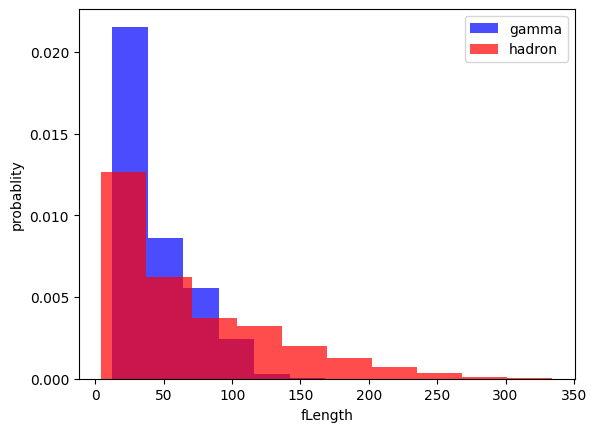

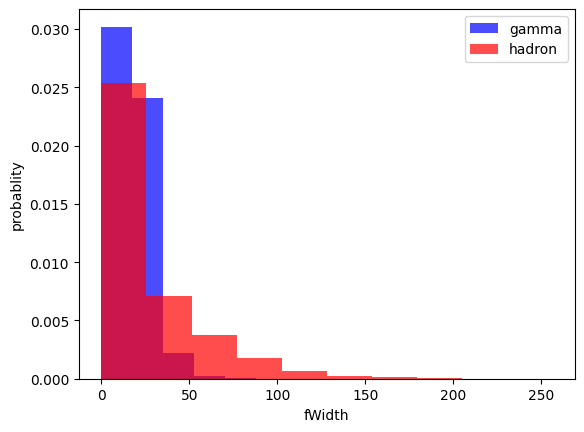

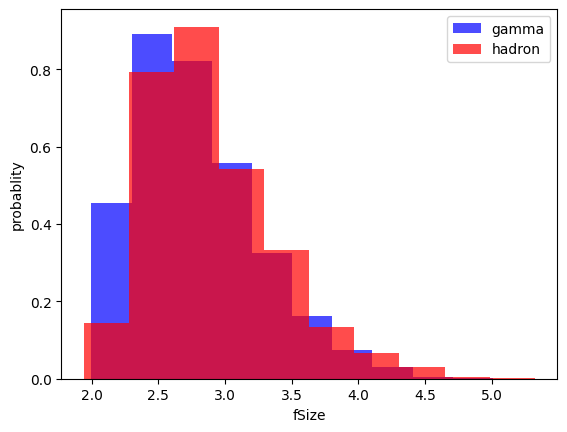

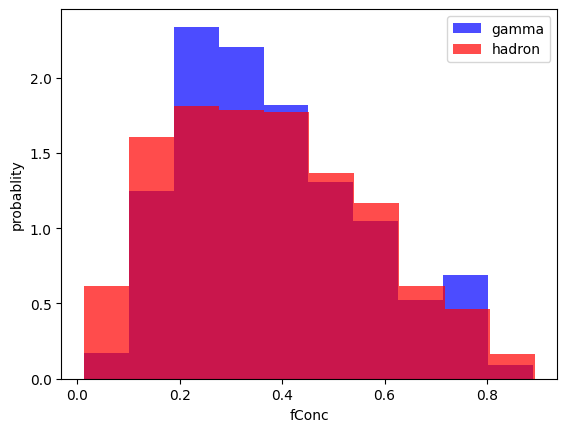

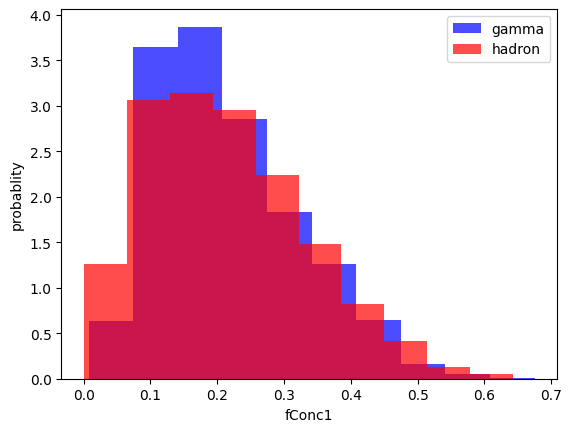

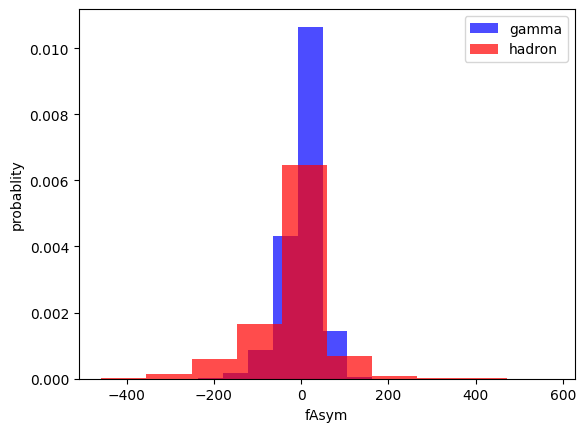

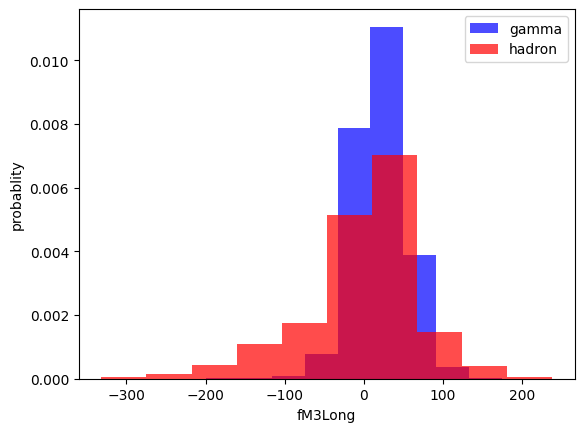

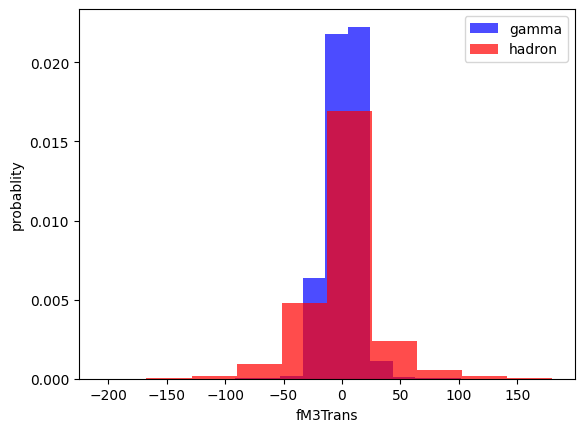

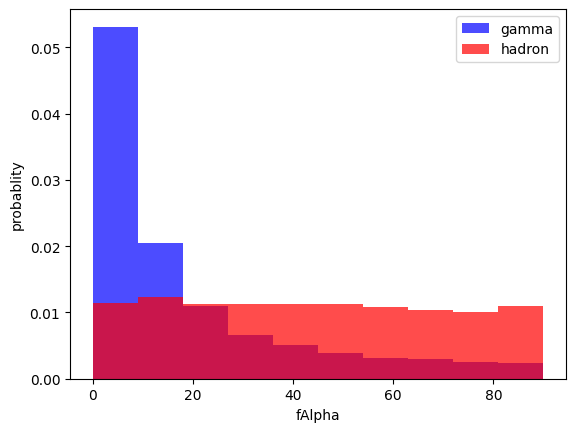

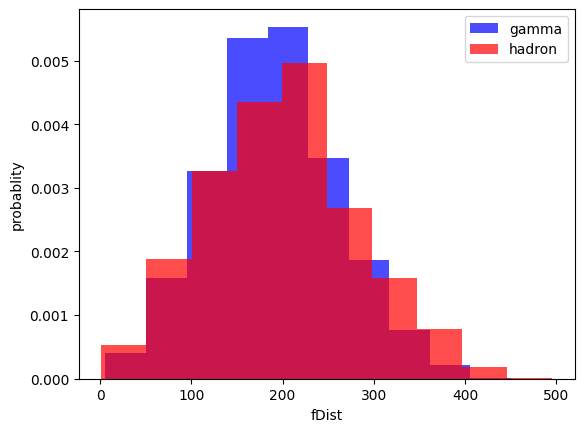

In [34]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
    plt.title=(label)
    plt.ylabel("probablity")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, validation, test datasets

In [37]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [35]:
def scale_dataset(dataframe,oversample=False):
    x=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    data=np.hstack((x,np.reshape(y,(-1,1))))
    return data,x,y


In [38]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [39]:
print("Train set:", train.shape)
print("Train set:", valid.shape)

Train set: (11412, 11)
Train set: (3804, 11)


KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [41]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
y_pred=knn_model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      1355
           1       0.83      0.89      0.86      2449

    accuracy                           0.81      3804
   macro avg       0.80      0.77      0.78      3804
weighted avg       0.80      0.81      0.80      3804



Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb_model = GaussianNB()
nb_model=nb_model.fit(X_train, y_train)

In [45]:
y_pred=nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.51      1354
           1       0.73      0.91      0.81      2450

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lg_model = LogisticRegression()
lg_model=lg_model.fit(X_train, y_train)

In [48]:
y_pred=lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.57      0.65      1354
           1       0.79      0.90      0.84      2450

    accuracy                           0.78      3804
   macro avg       0.78      0.74      0.75      3804
weighted avg       0.78      0.78      0.78      3804



SVM

In [49]:
from sklearn.svm import SVC

In [50]:
svm_model = SVC()
svm_model=svm_model.fit(X_train, y_train)


In [51]:
y_pred=svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1354
           1       0.85      0.96      0.90      2450

    accuracy                           0.86      3804
   macro avg       0.88      0.82      0.84      3804
weighted avg       0.87      0.86      0.86      3804



Neural Network

In [52]:
import tensorflow as tf

In [53]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()
#plotting the accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [54]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Use the correct input shape
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [56]:
def plot_history(history):
  fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,8))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)
  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel ('Accuracy')
  ax2.grid(True)
  plt.show()

In [57]:
def train_model(X_train,Y_train,num_nodes,dropout_prob,lr,batch_size,epochs ):
    nn_model=tf.keras.Sequential((
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ))
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
                    metrics=['accuracy'])
    history = nn_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0)
    return nn_model,history

16 nodes, dropout 0, lr 0.01, batch size 32


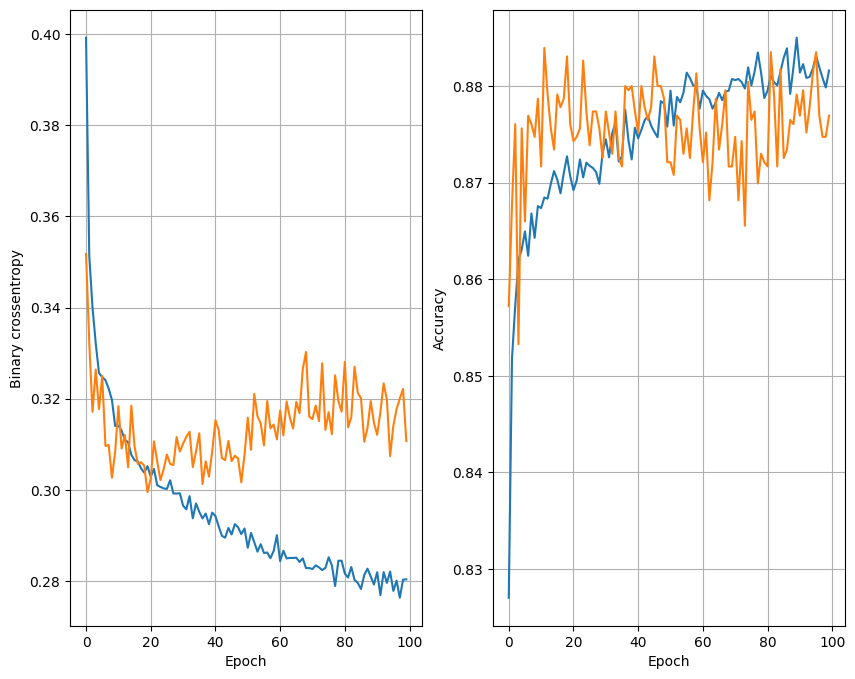

Validation Loss: 0.34007948637008667
Updated least loss model.
16 nodes, dropout 0, lr 0.01, batch size 64


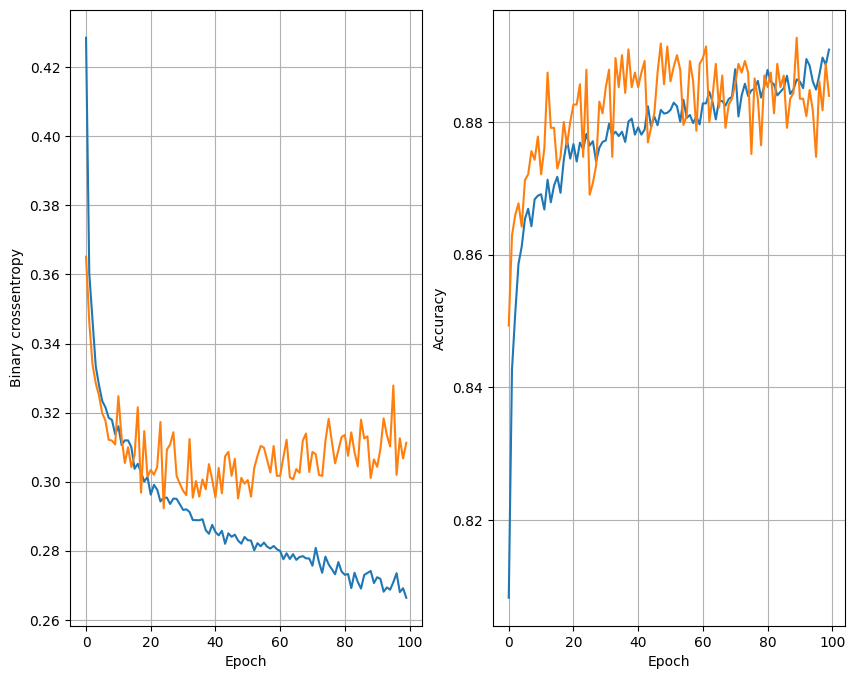

Validation Loss: 0.3214733898639679
Updated least loss model.
16 nodes, dropout 0, lr 0.01, batch size 128


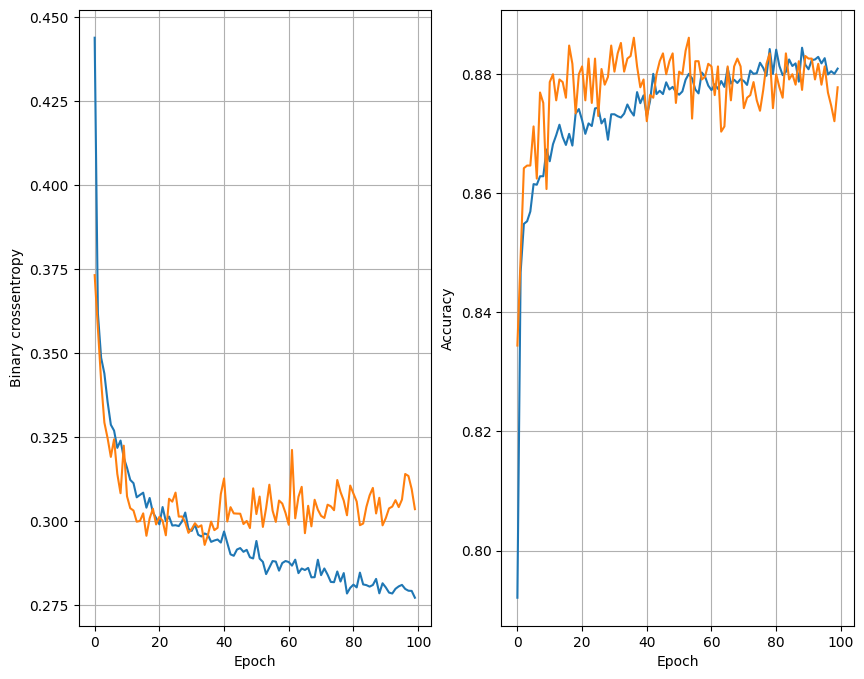

Validation Loss: 0.32079488039016724
Updated least loss model.
16 nodes, dropout 0, lr 0.005, batch size 32


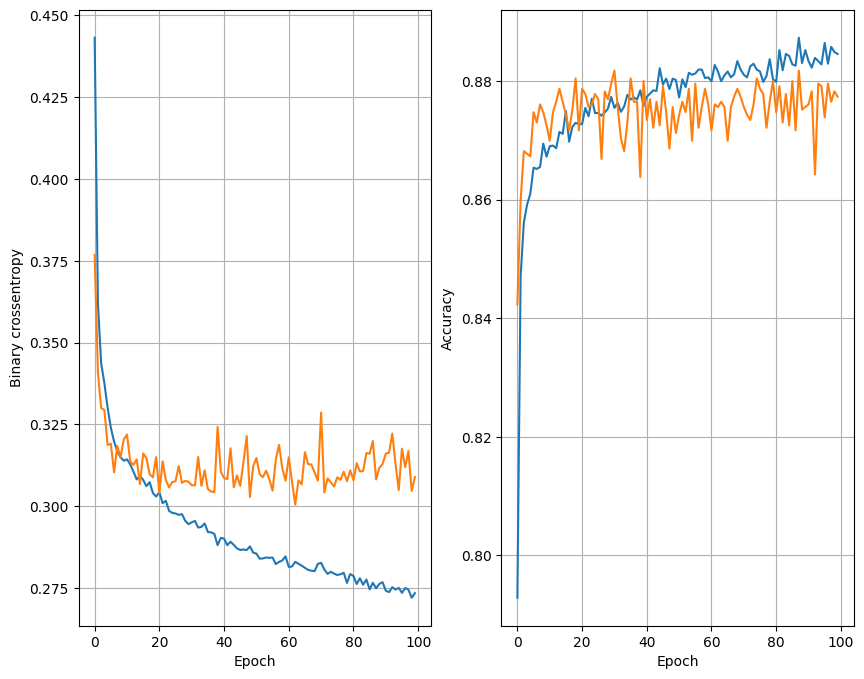

Validation Loss: 0.3167014718055725
Updated least loss model.
16 nodes, dropout 0, lr 0.005, batch size 64


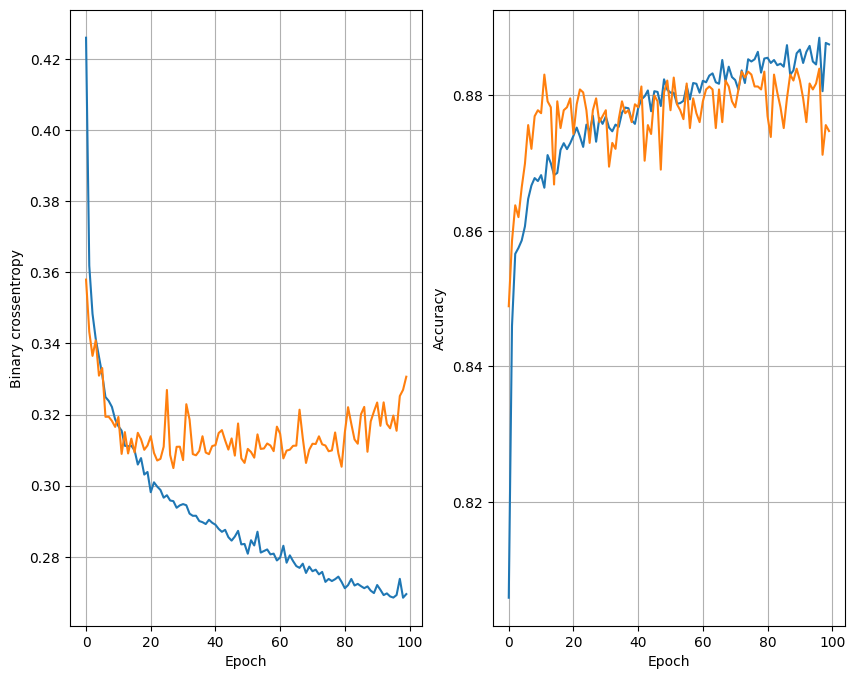

Validation Loss: 0.3344346582889557
16 nodes, dropout 0, lr 0.005, batch size 128


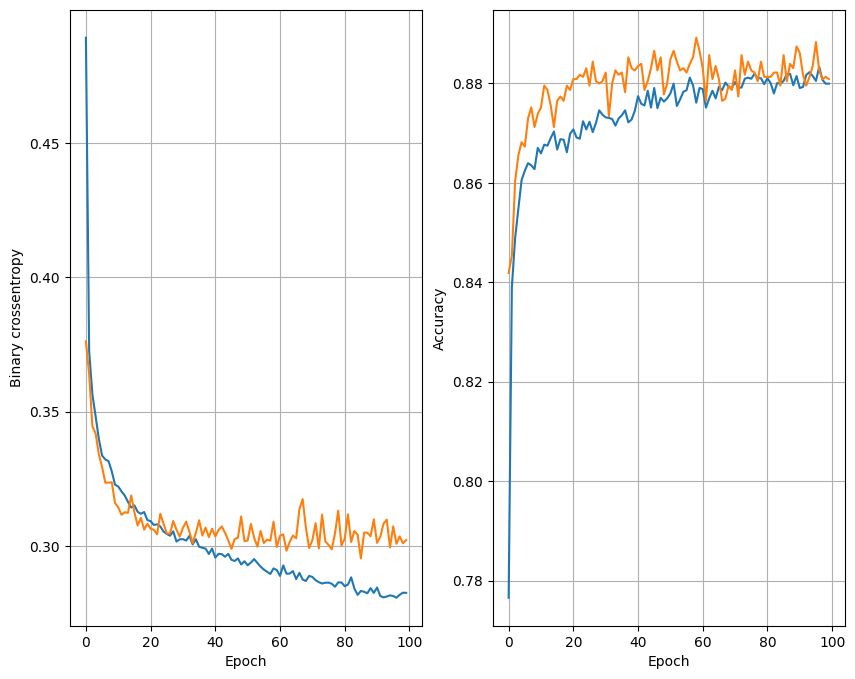

Validation Loss: 0.329387366771698
16 nodes, dropout 0, lr 0.001, batch size 32


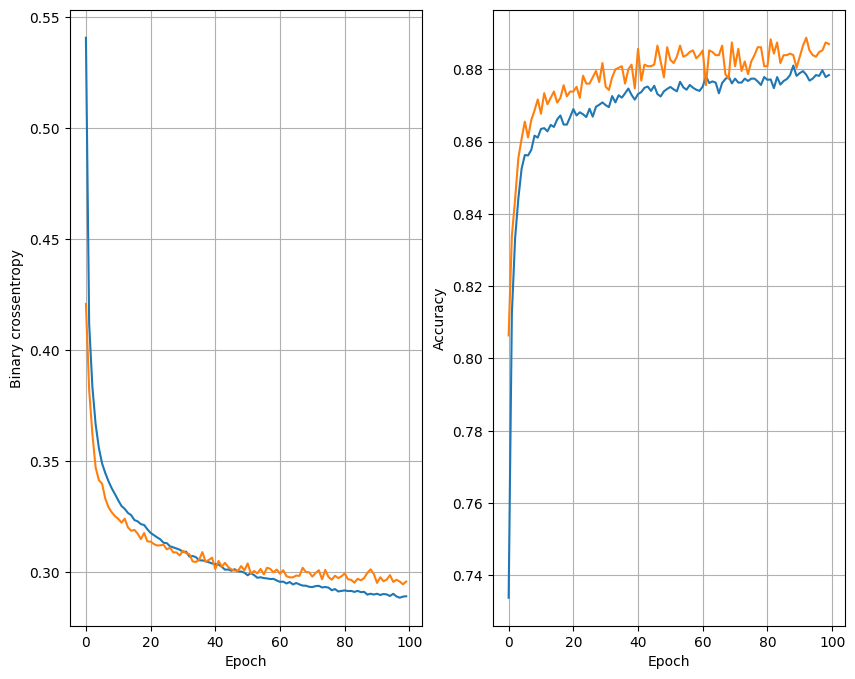

Validation Loss: 0.3112281858921051
Updated least loss model.
16 nodes, dropout 0, lr 0.001, batch size 64


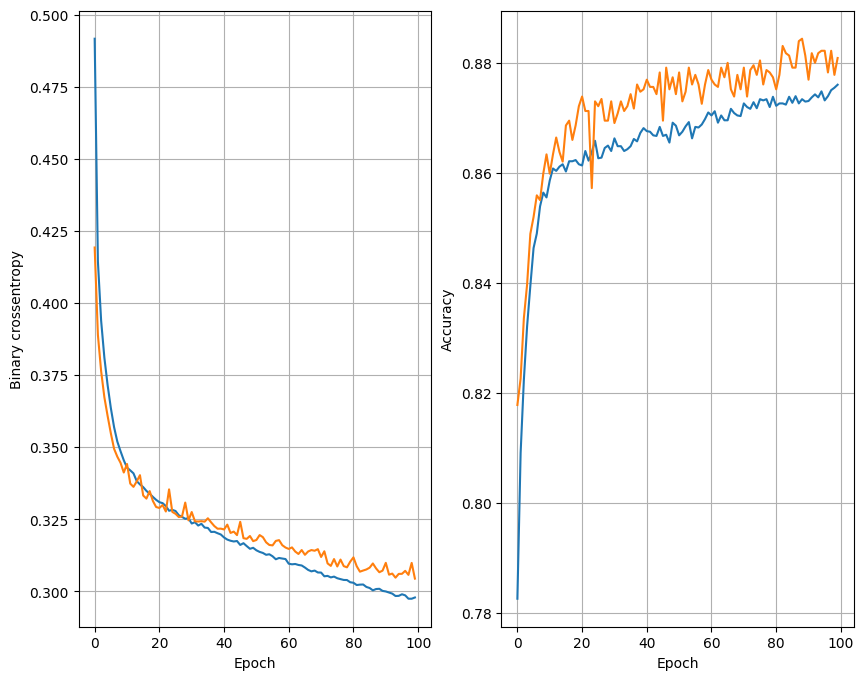

Validation Loss: 0.3196389377117157
16 nodes, dropout 0, lr 0.001, batch size 128


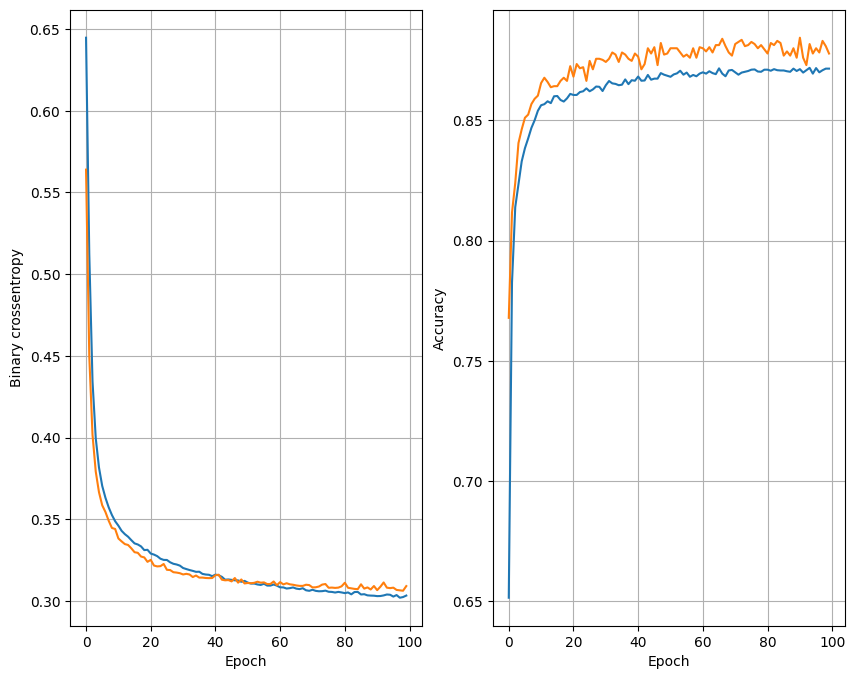

Validation Loss: 0.3212047517299652
16 nodes, dropout 0.2, lr 0.01, batch size 32


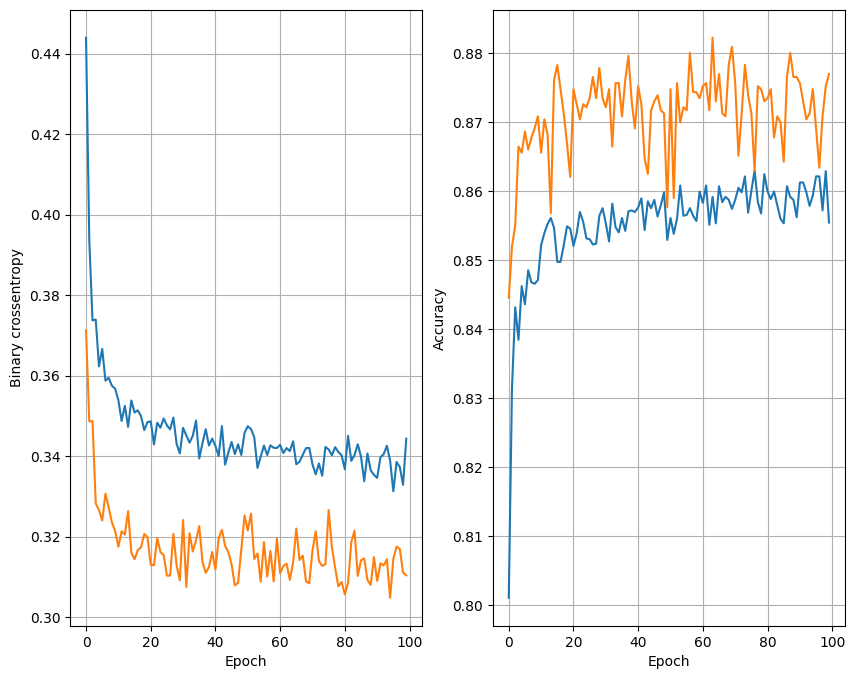

Validation Loss: 0.32711079716682434
16 nodes, dropout 0.2, lr 0.01, batch size 64


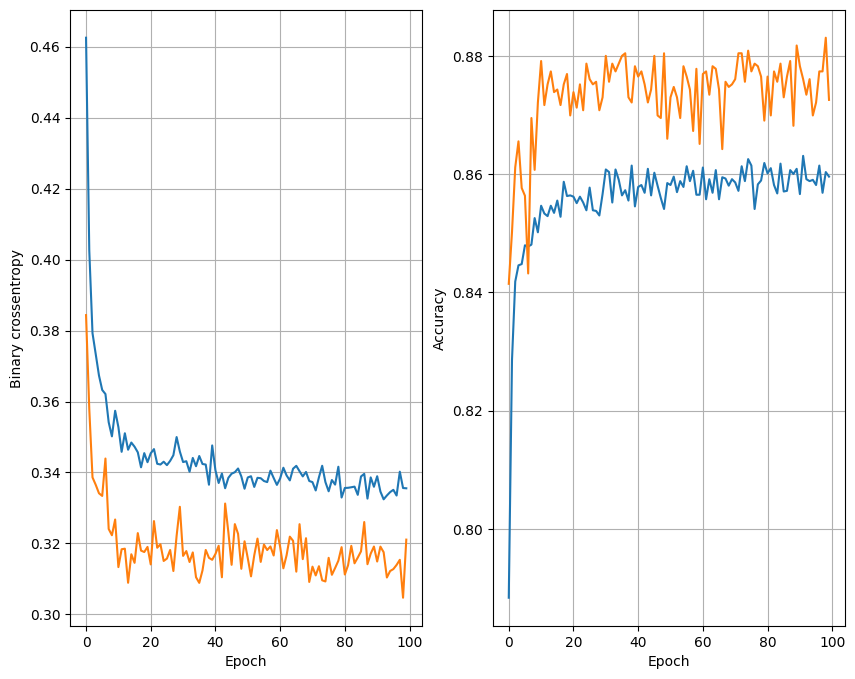

Validation Loss: 0.334882915019989
16 nodes, dropout 0.2, lr 0.01, batch size 128


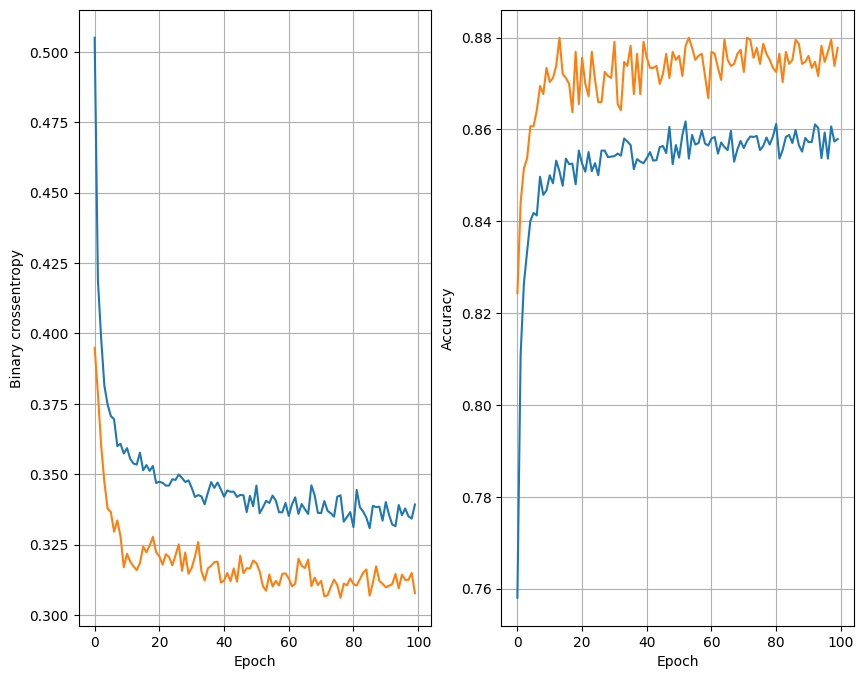

Validation Loss: 0.329162061214447
16 nodes, dropout 0.2, lr 0.005, batch size 32


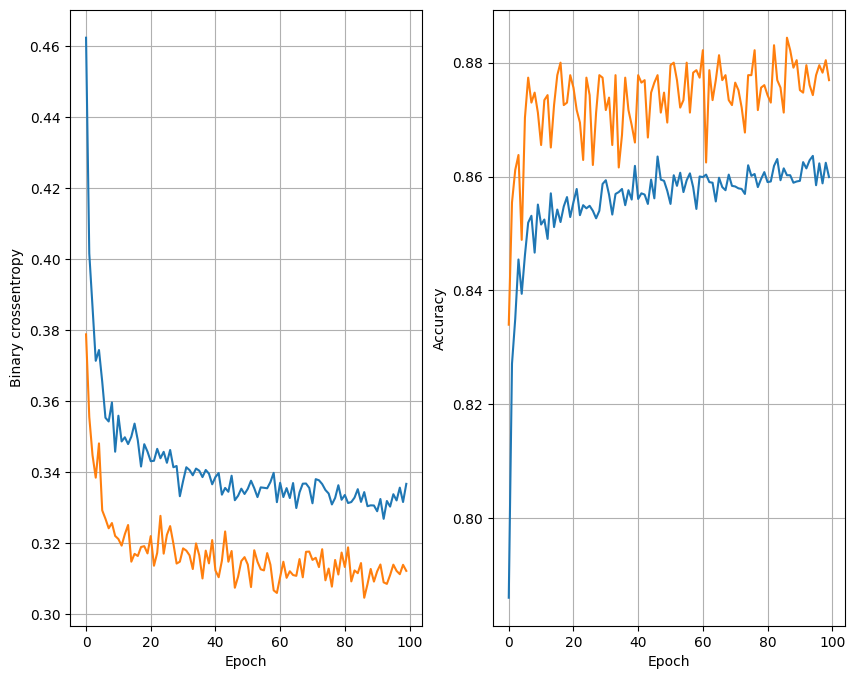

Validation Loss: 0.3293396234512329
16 nodes, dropout 0.2, lr 0.005, batch size 64


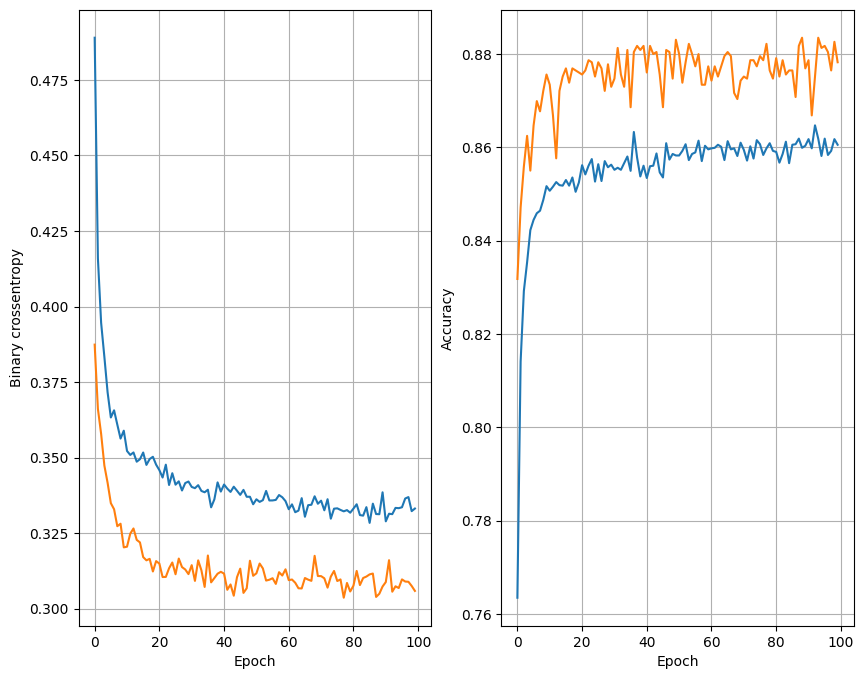

Validation Loss: 0.32324329018592834
16 nodes, dropout 0.2, lr 0.005, batch size 128


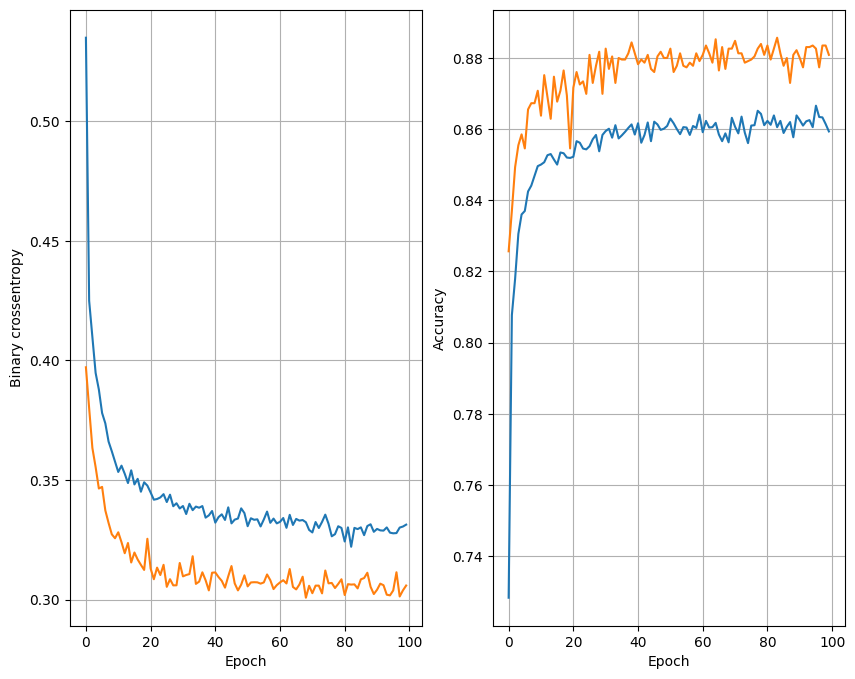

Validation Loss: 0.32068541646003723
16 nodes, dropout 0.2, lr 0.001, batch size 32


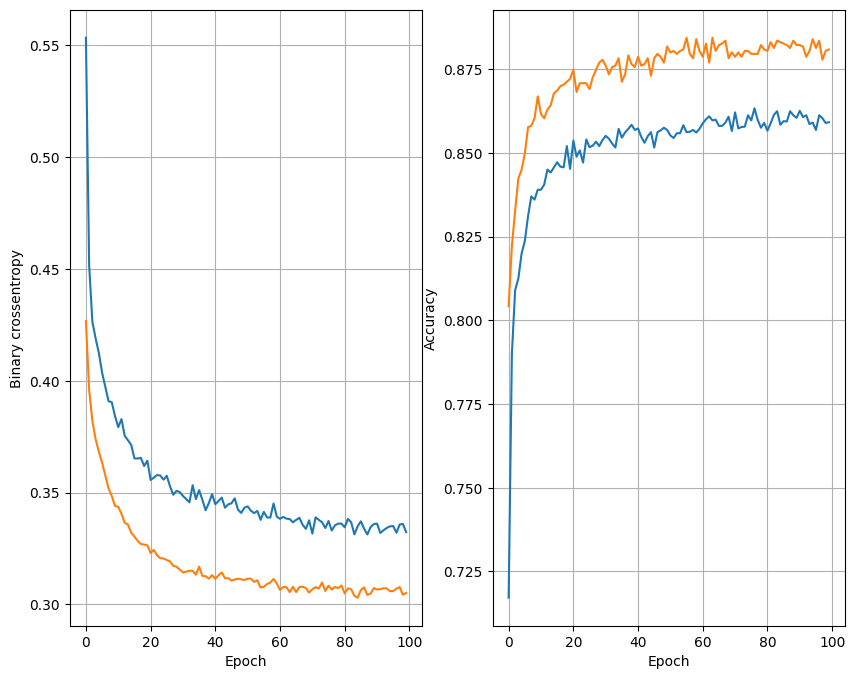

Validation Loss: 0.32532480359077454
16 nodes, dropout 0.2, lr 0.001, batch size 64


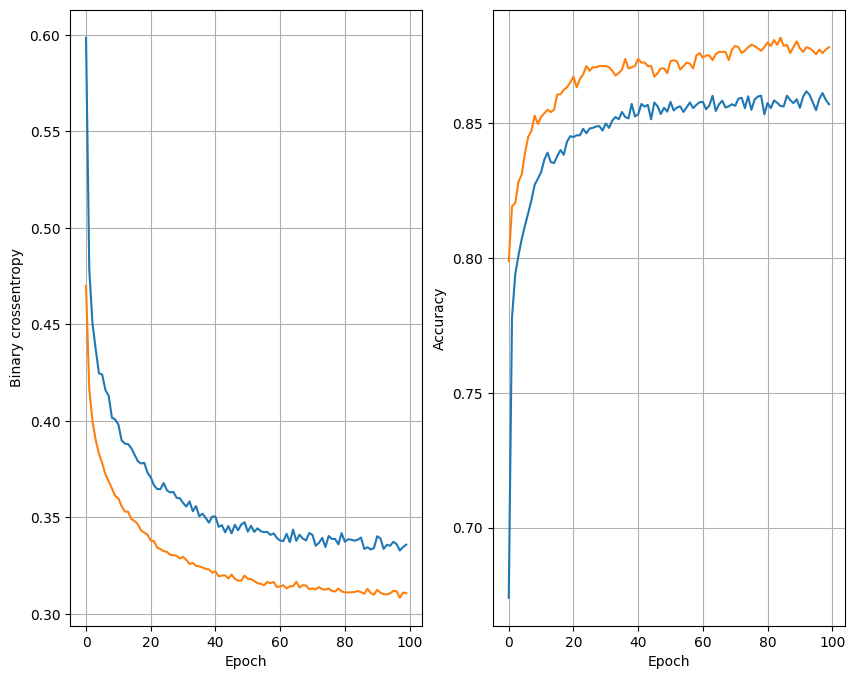

Validation Loss: 0.32568398118019104
16 nodes, dropout 0.2, lr 0.001, batch size 128


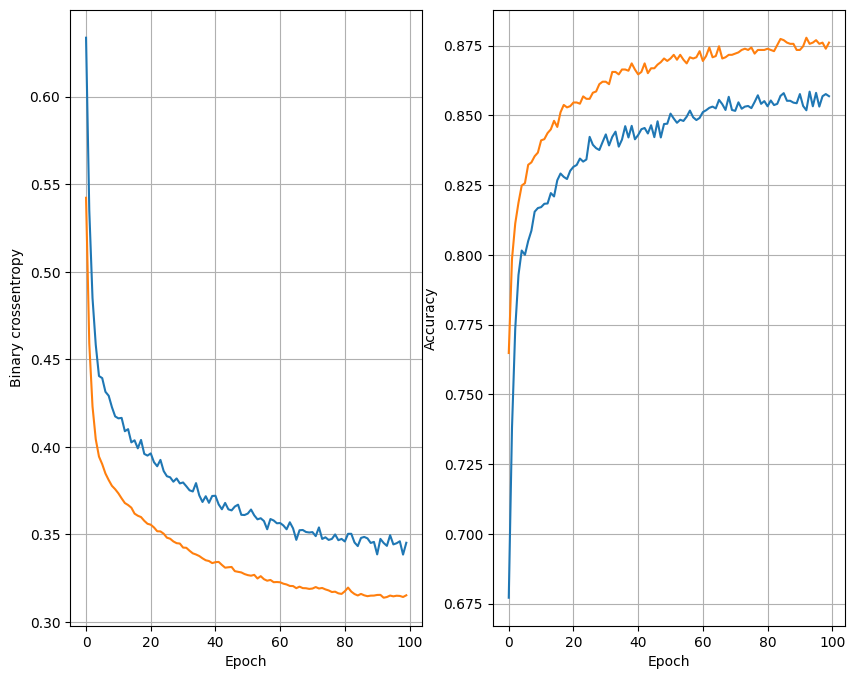

Validation Loss: 0.3322206437587738
32 nodes, dropout 0, lr 0.01, batch size 32


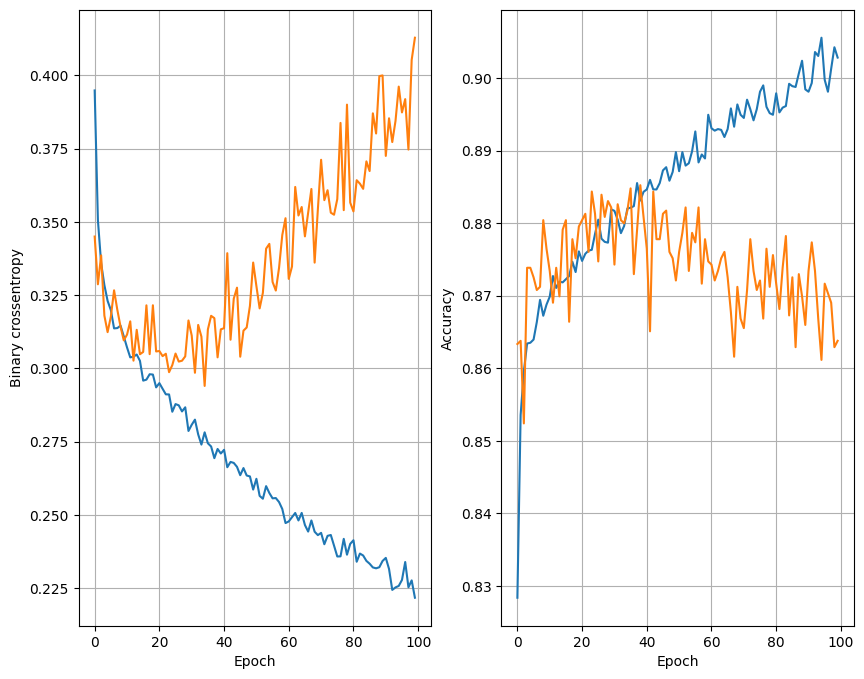

Validation Loss: 0.4771222770214081
32 nodes, dropout 0, lr 0.01, batch size 64


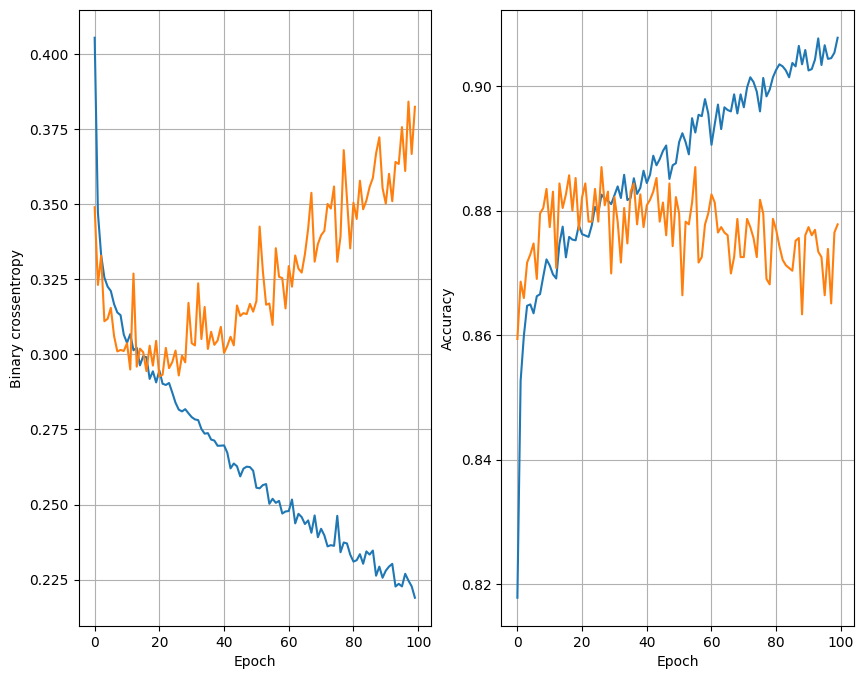

Validation Loss: 0.4069593846797943
32 nodes, dropout 0, lr 0.01, batch size 128


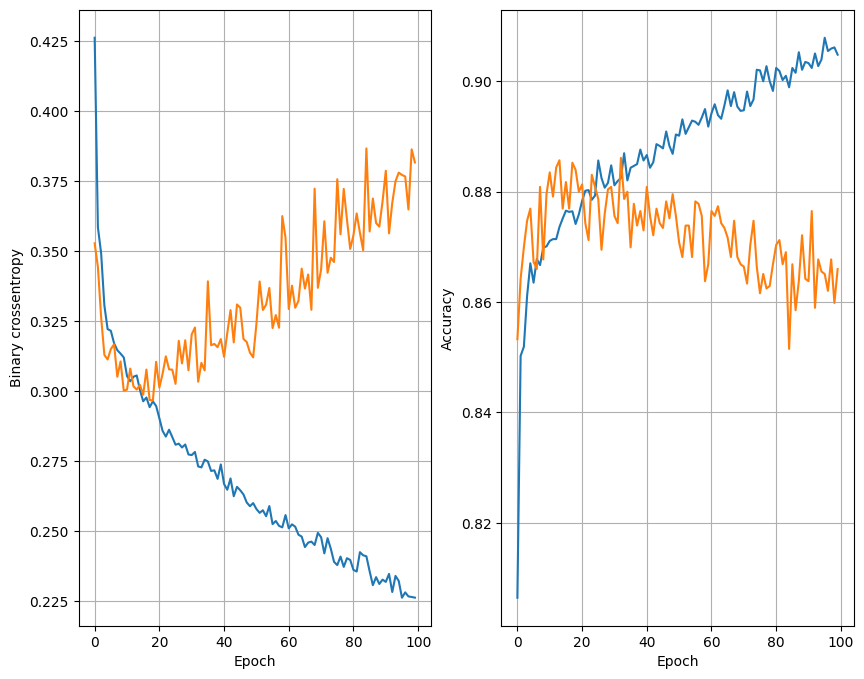

Validation Loss: 0.38048750162124634
32 nodes, dropout 0, lr 0.005, batch size 32


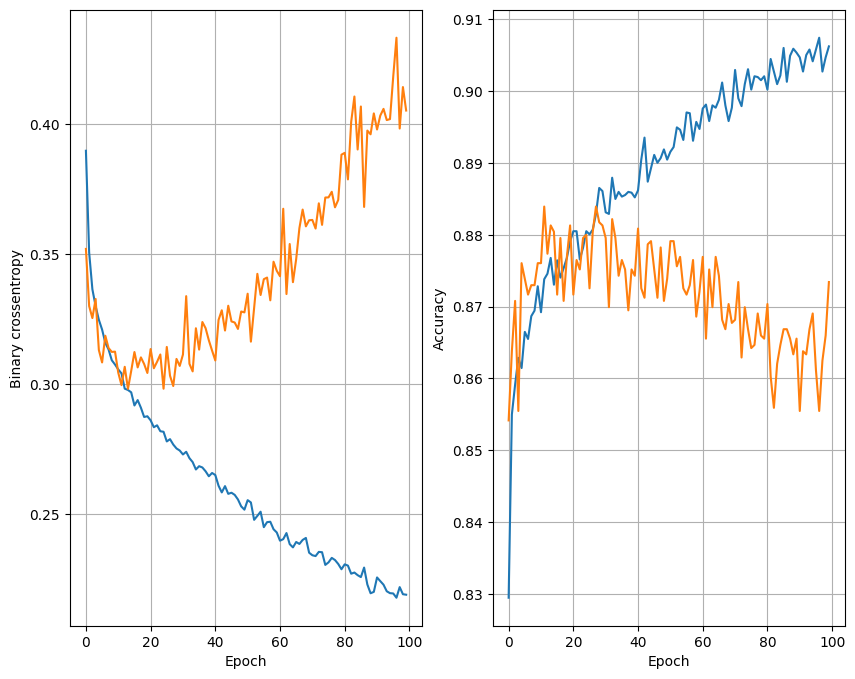

Validation Loss: 0.40365278720855713
32 nodes, dropout 0, lr 0.005, batch size 64


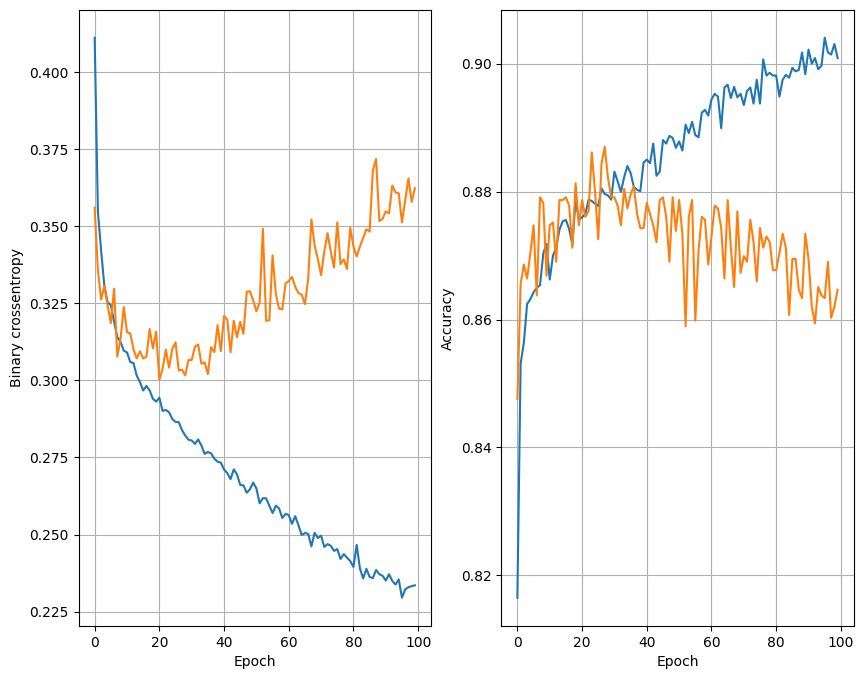

Validation Loss: 0.39206913113594055
32 nodes, dropout 0, lr 0.005, batch size 128


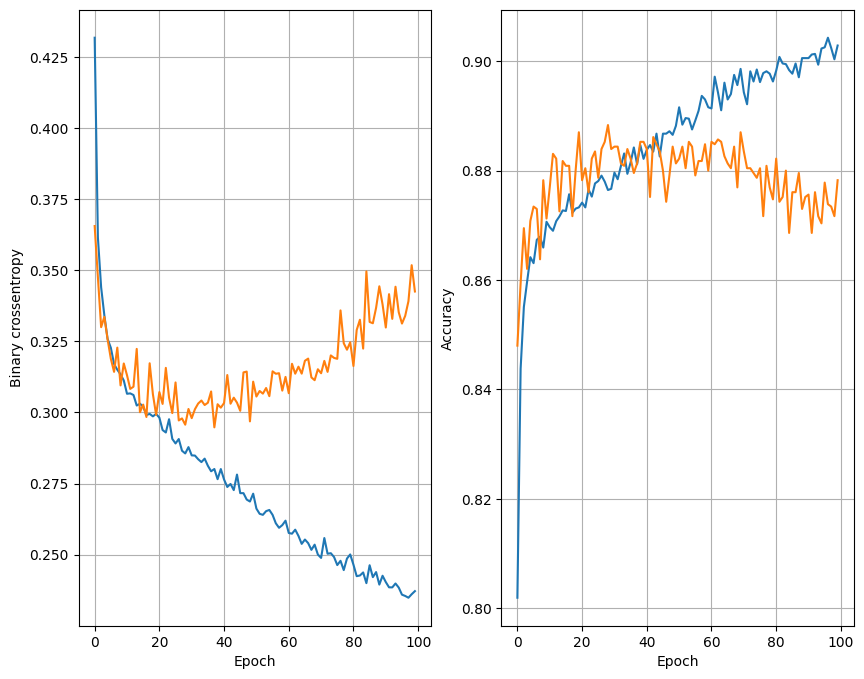

Validation Loss: 0.3517318367958069
32 nodes, dropout 0, lr 0.001, batch size 32


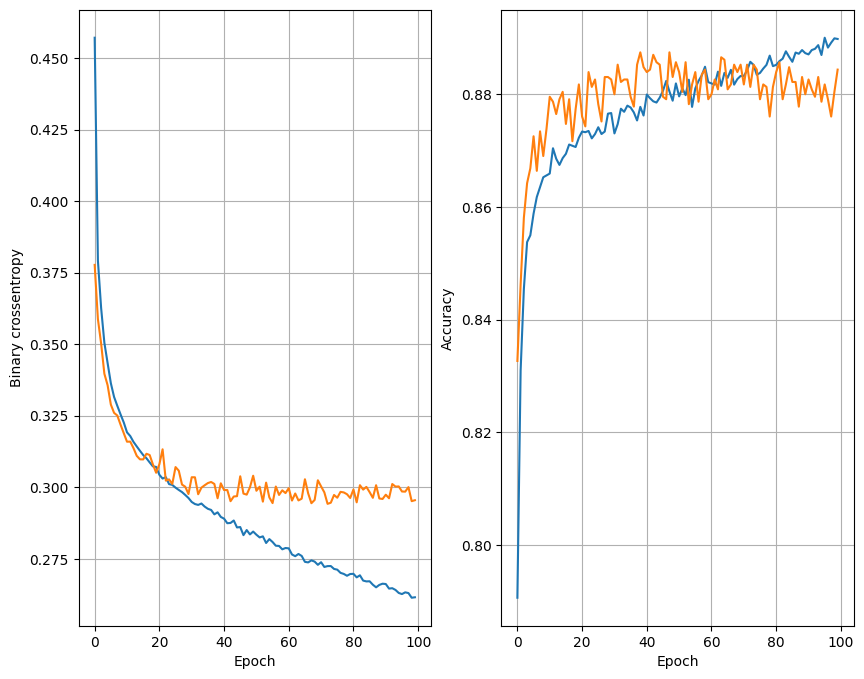

Validation Loss: 0.3139687180519104
32 nodes, dropout 0, lr 0.001, batch size 64


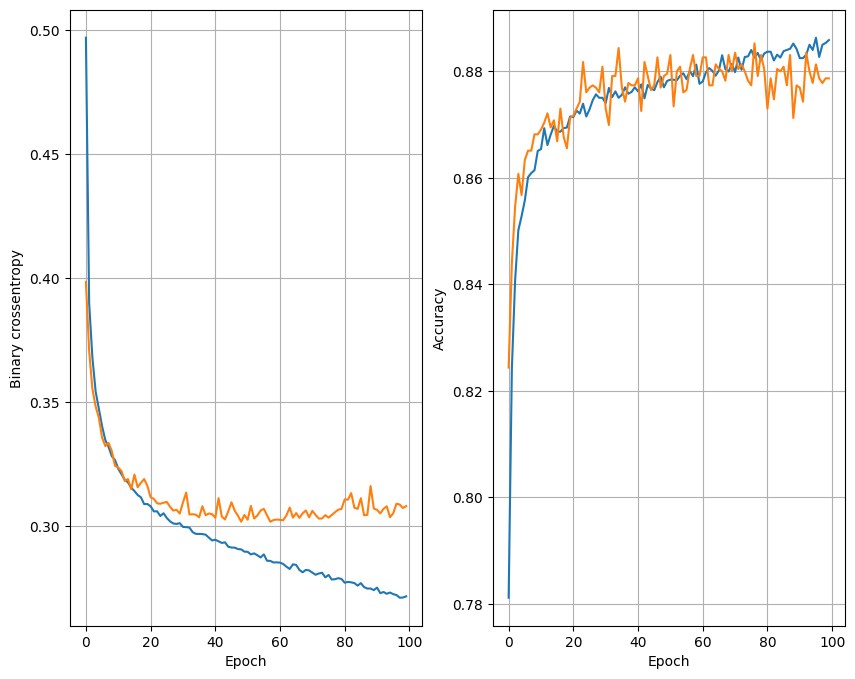

Validation Loss: 0.3164553940296173
32 nodes, dropout 0, lr 0.001, batch size 128


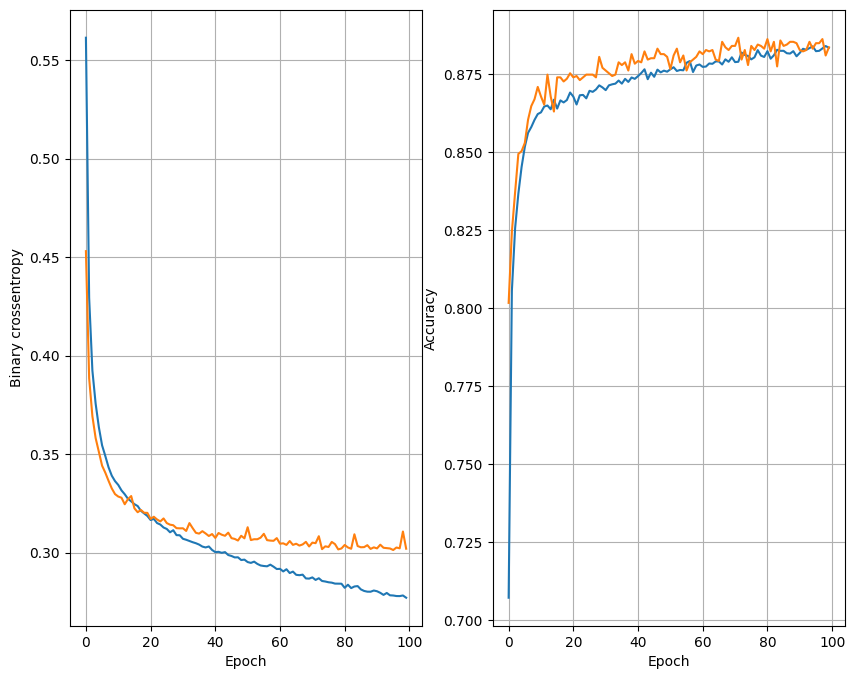

Validation Loss: 0.3181508183479309
32 nodes, dropout 0.2, lr 0.01, batch size 32


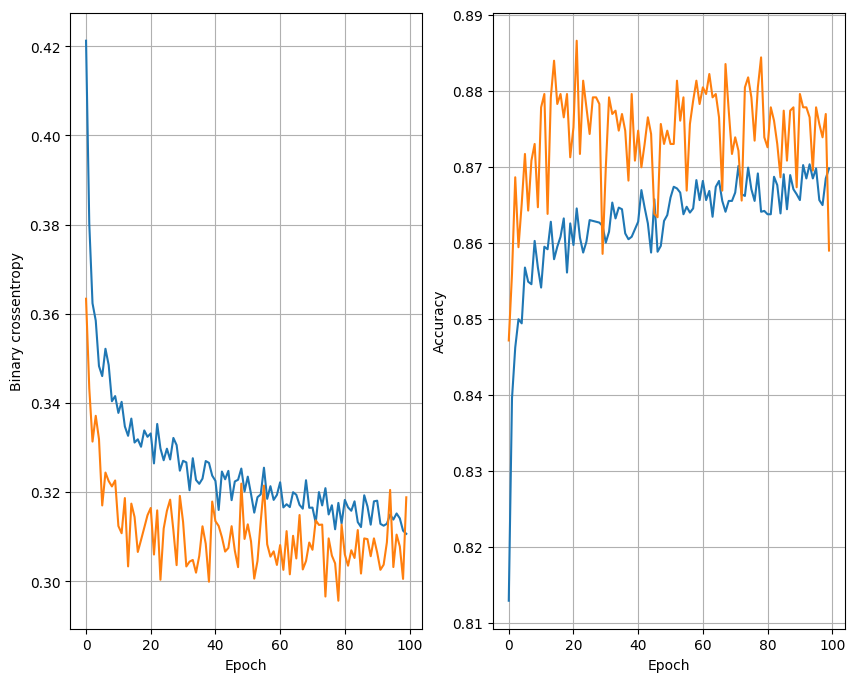

Validation Loss: 0.33281710743904114
32 nodes, dropout 0.2, lr 0.01, batch size 64


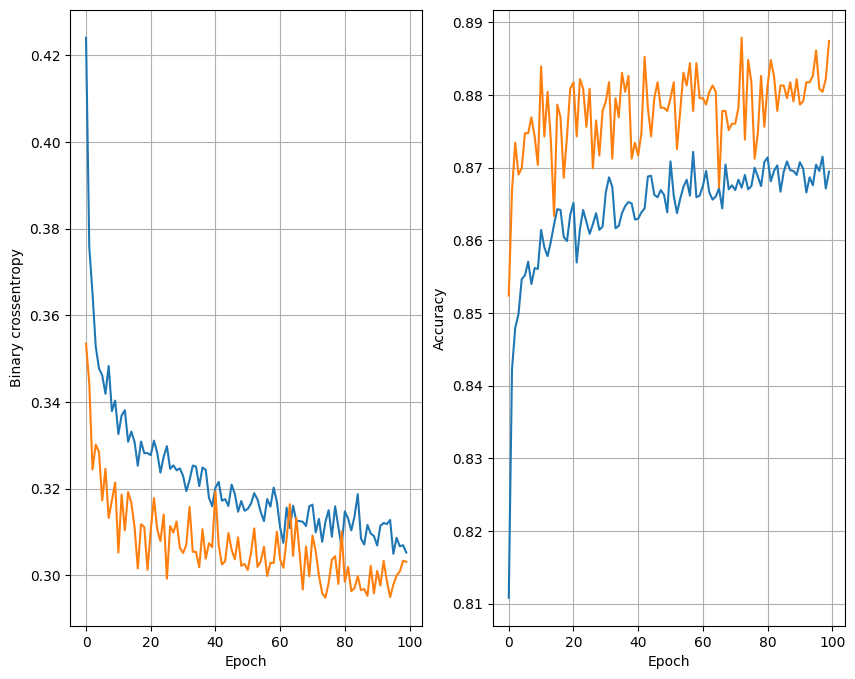

Validation Loss: 0.31827837228775024
32 nodes, dropout 0.2, lr 0.01, batch size 128


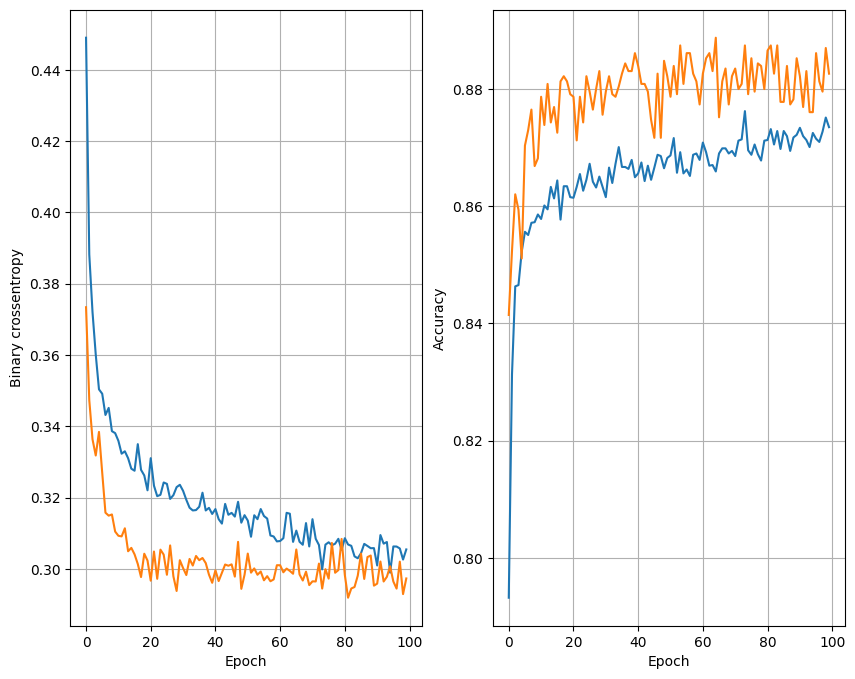

Validation Loss: 0.3128378987312317
32 nodes, dropout 0.2, lr 0.005, batch size 32


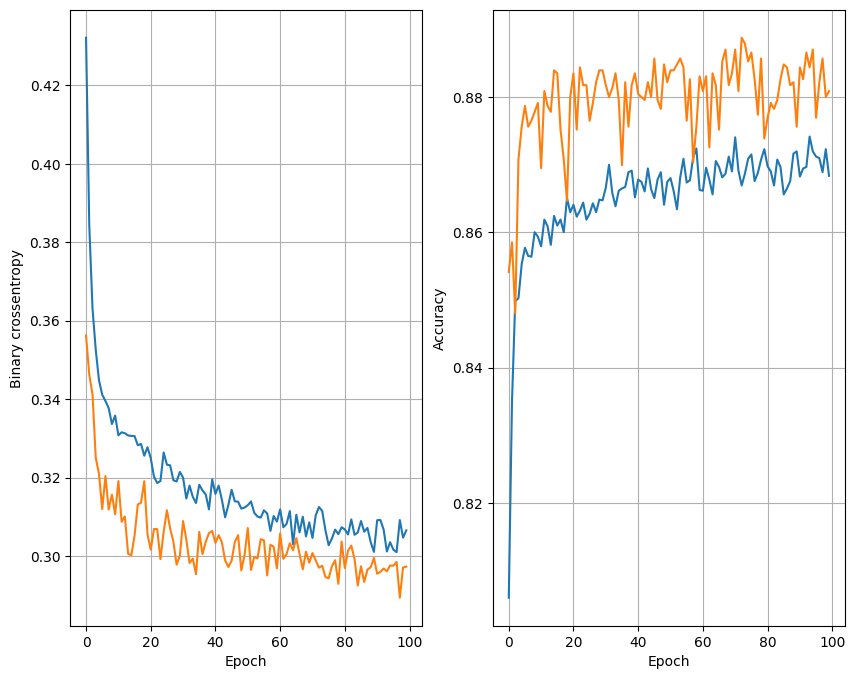

Validation Loss: 0.3153374493122101
32 nodes, dropout 0.2, lr 0.005, batch size 64


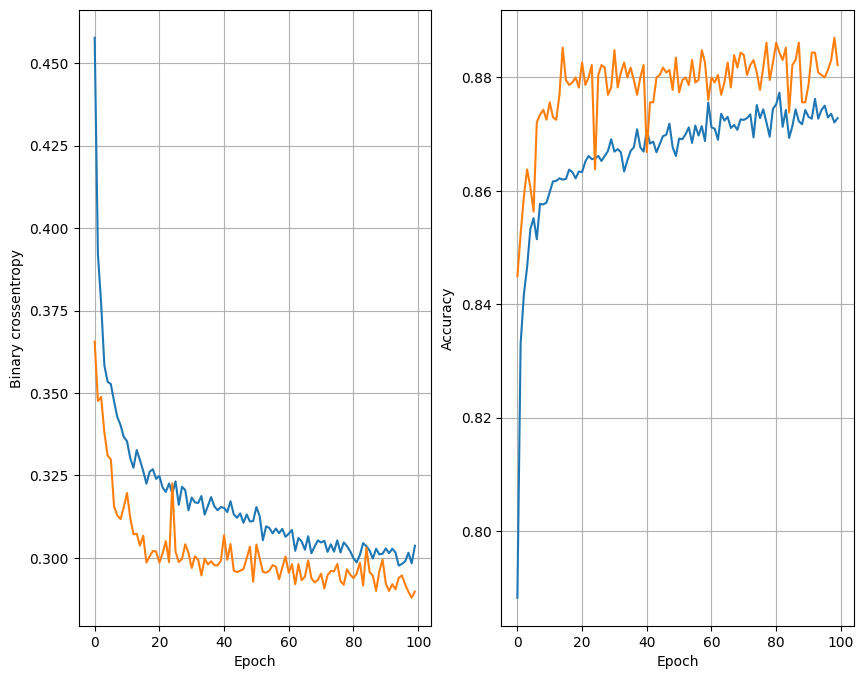

Validation Loss: 0.30946114659309387
Updated least loss model.
32 nodes, dropout 0.2, lr 0.005, batch size 128


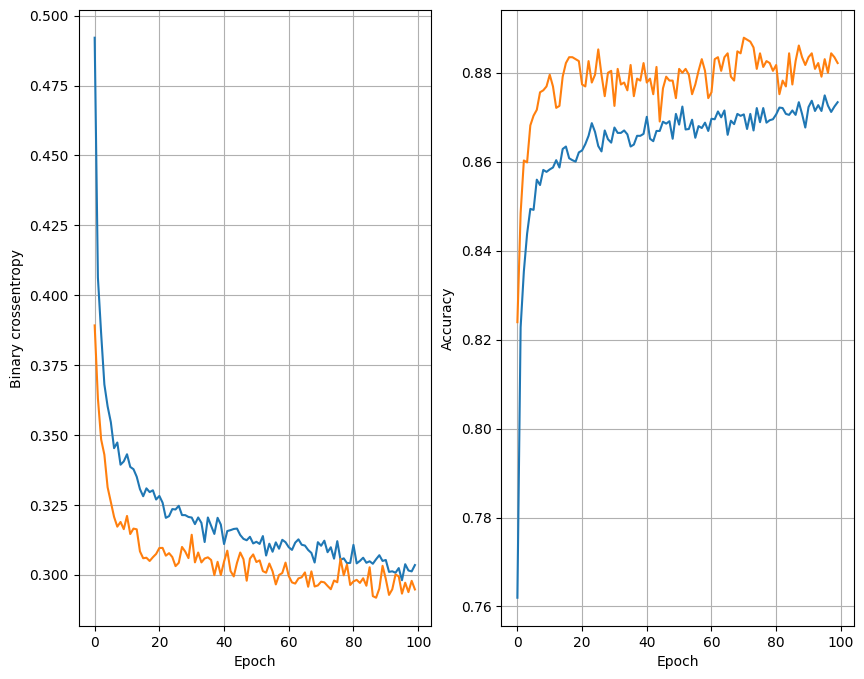

Validation Loss: 0.30925777554512024
Updated least loss model.
32 nodes, dropout 0.2, lr 0.001, batch size 32


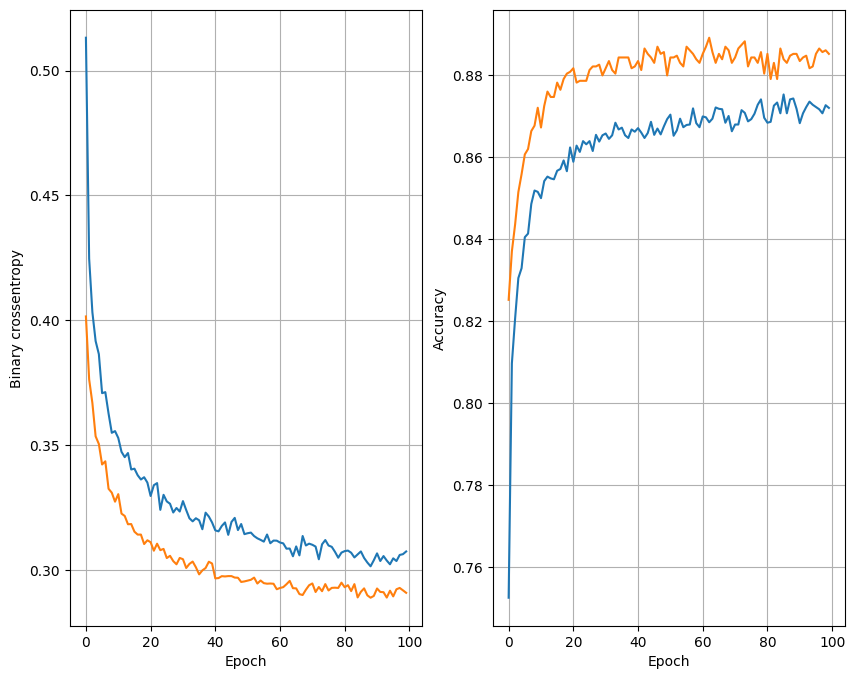

Validation Loss: 0.3096569776535034
32 nodes, dropout 0.2, lr 0.001, batch size 64


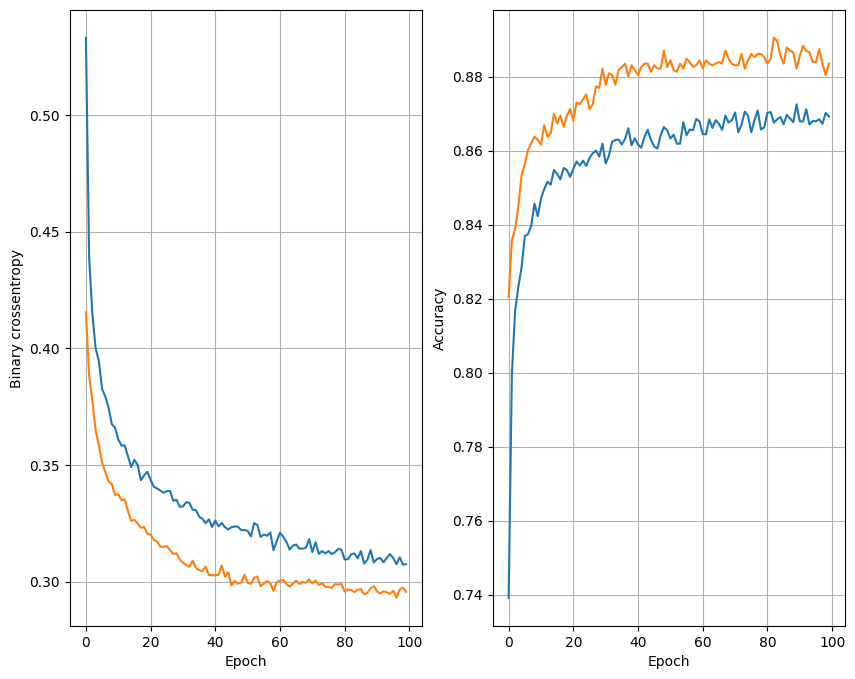

Validation Loss: 0.3073704242706299
Updated least loss model.
32 nodes, dropout 0.2, lr 0.001, batch size 128


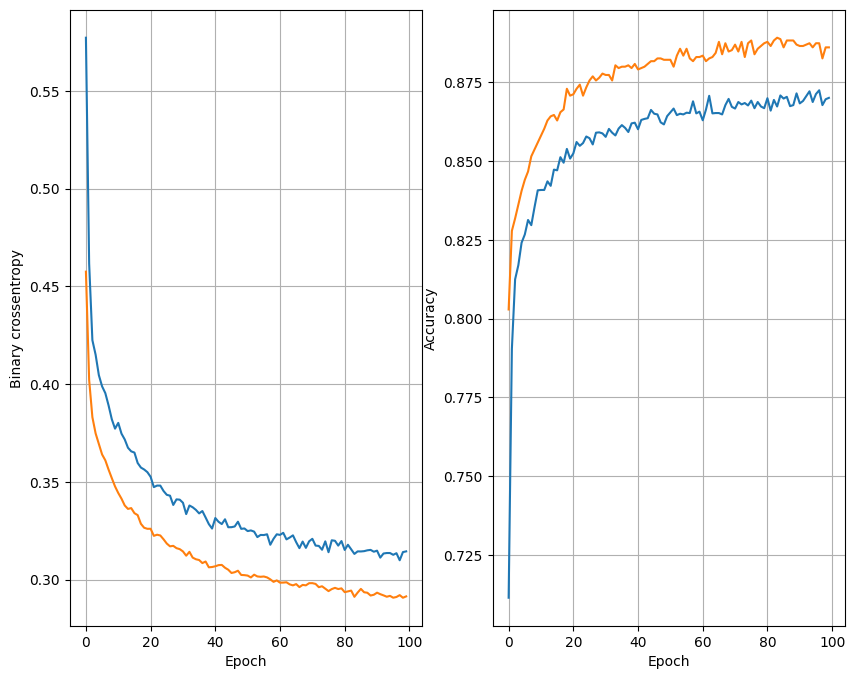

Validation Loss: 0.31046411395072937
64 nodes, dropout 0, lr 0.01, batch size 32


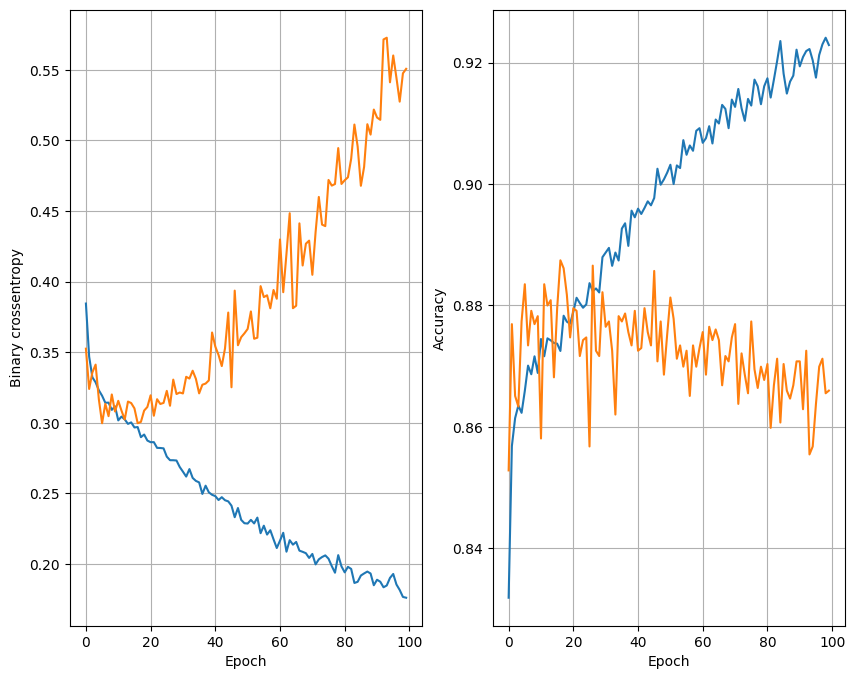

Validation Loss: 0.605930507183075
64 nodes, dropout 0, lr 0.01, batch size 64


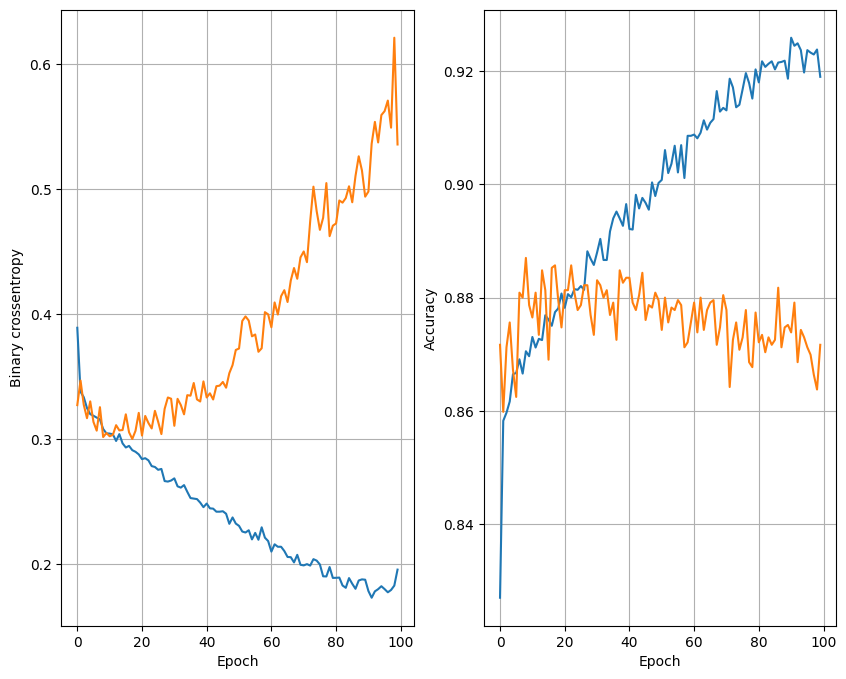

Validation Loss: 0.5876911282539368
64 nodes, dropout 0, lr 0.01, batch size 128


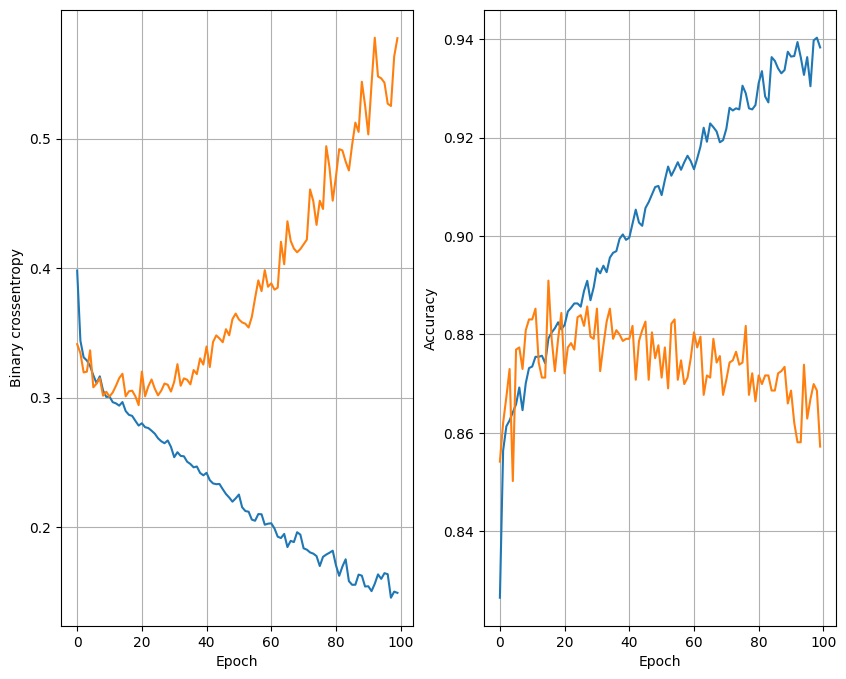

Validation Loss: 0.6186234354972839
64 nodes, dropout 0, lr 0.005, batch size 32


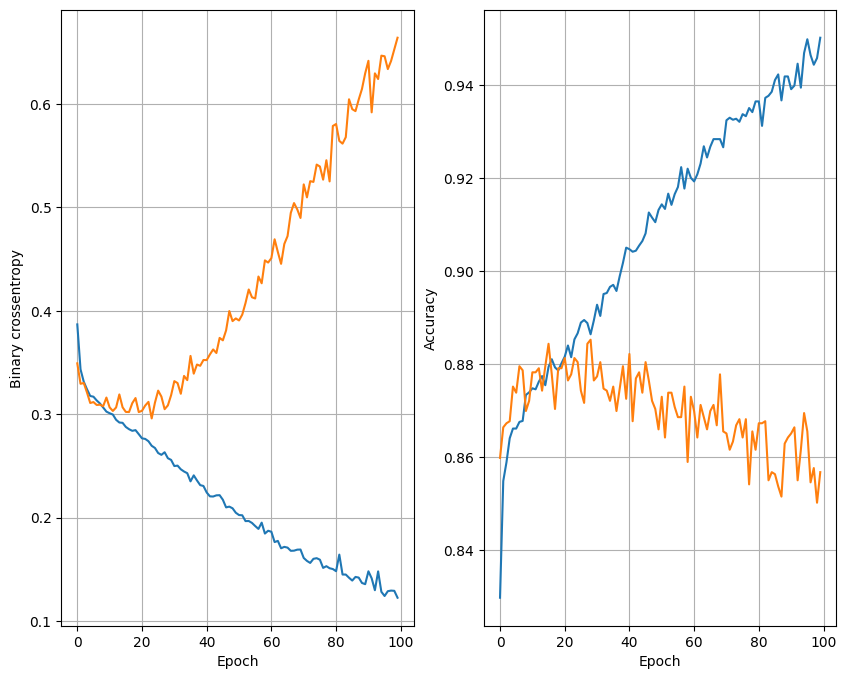

Validation Loss: 0.6775206327438354
64 nodes, dropout 0, lr 0.005, batch size 64


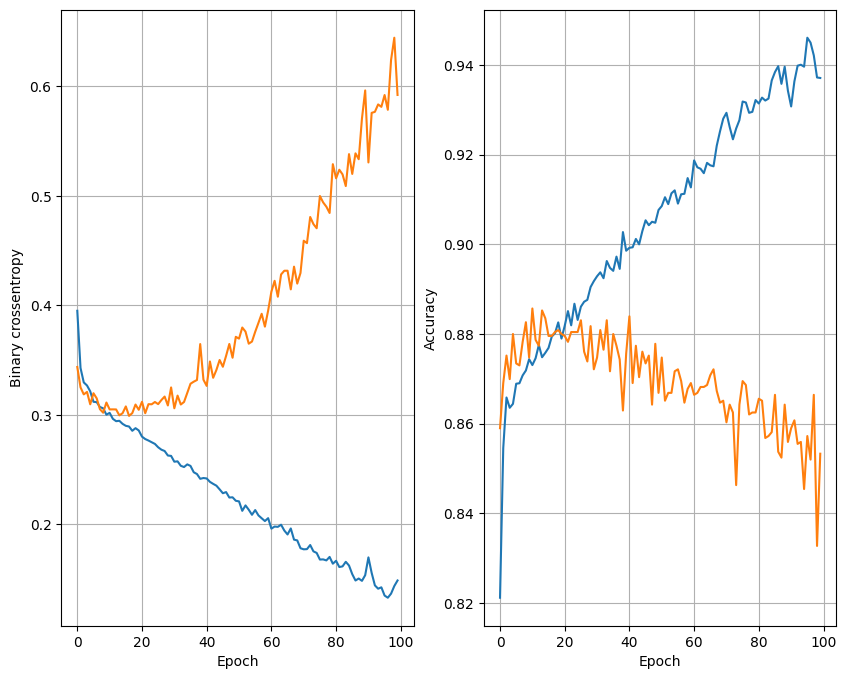

Validation Loss: 0.6448884606361389
64 nodes, dropout 0, lr 0.005, batch size 128


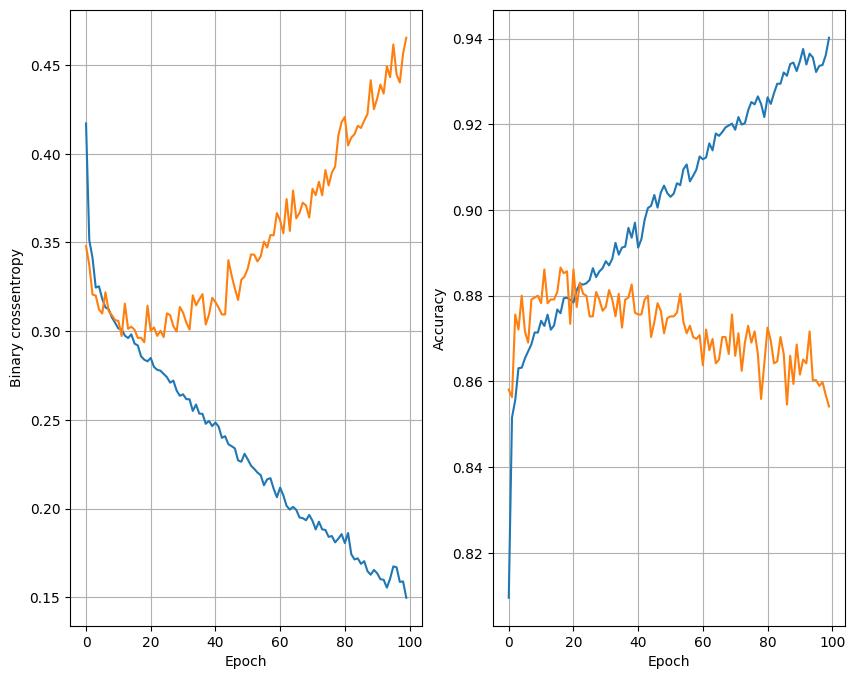

Validation Loss: 0.5083370804786682
64 nodes, dropout 0, lr 0.001, batch size 32


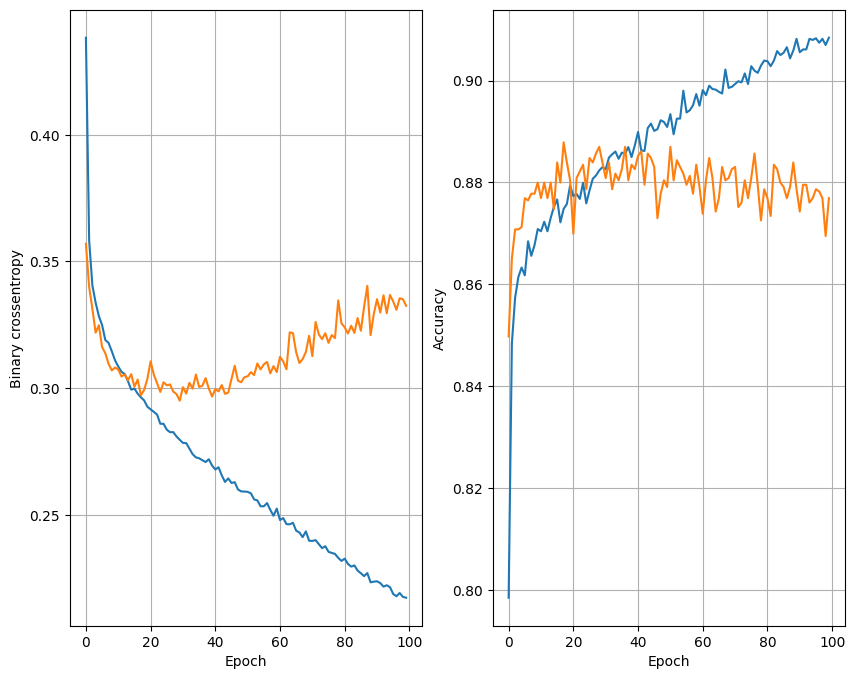

Validation Loss: 0.3406156301498413
64 nodes, dropout 0, lr 0.001, batch size 64


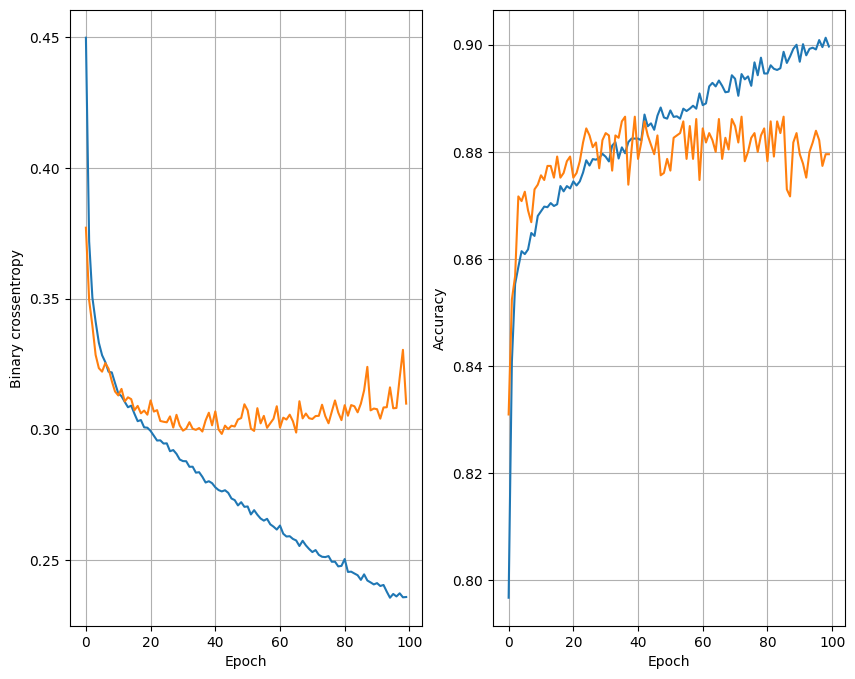

Validation Loss: 0.32337337732315063
64 nodes, dropout 0, lr 0.001, batch size 128


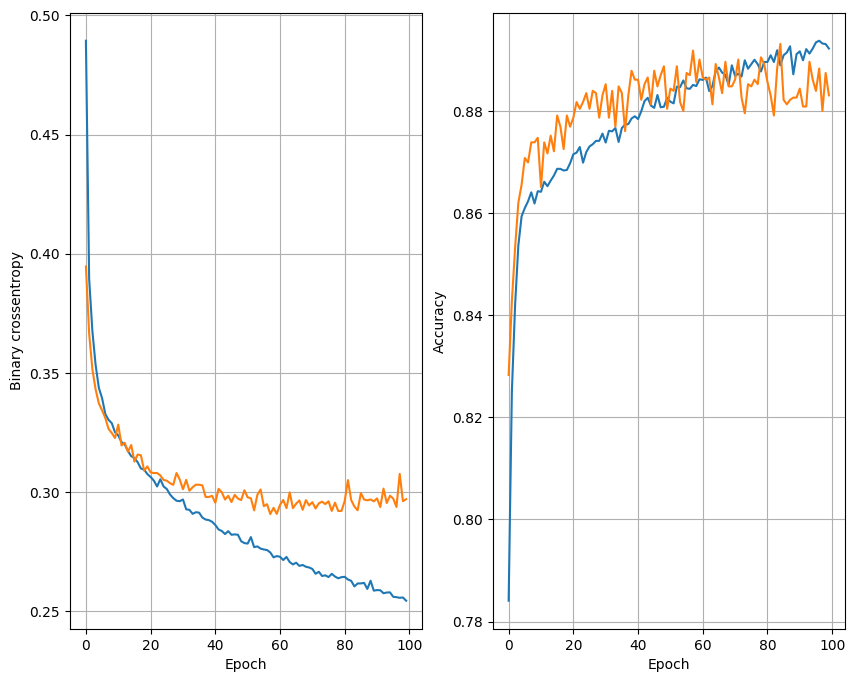

Validation Loss: 0.31740549206733704
64 nodes, dropout 0.2, lr 0.01, batch size 32


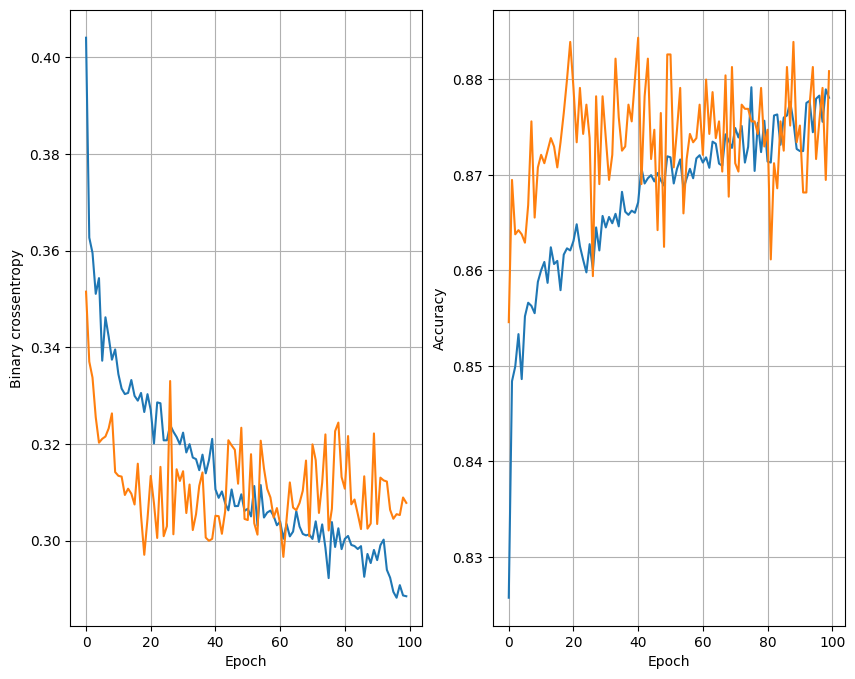

Validation Loss: 0.3247453272342682
64 nodes, dropout 0.2, lr 0.01, batch size 64


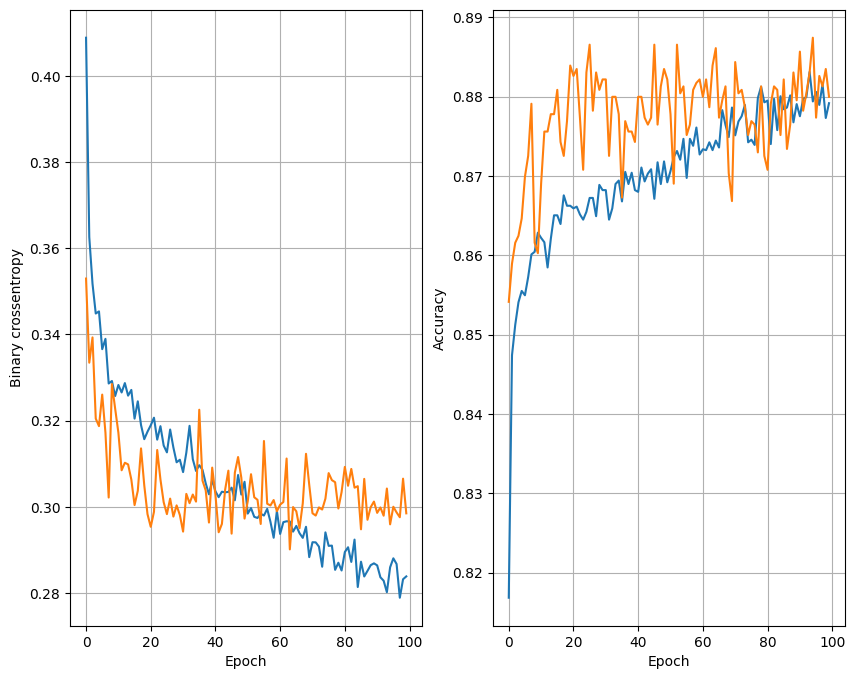

Validation Loss: 0.3332359492778778
64 nodes, dropout 0.2, lr 0.01, batch size 128


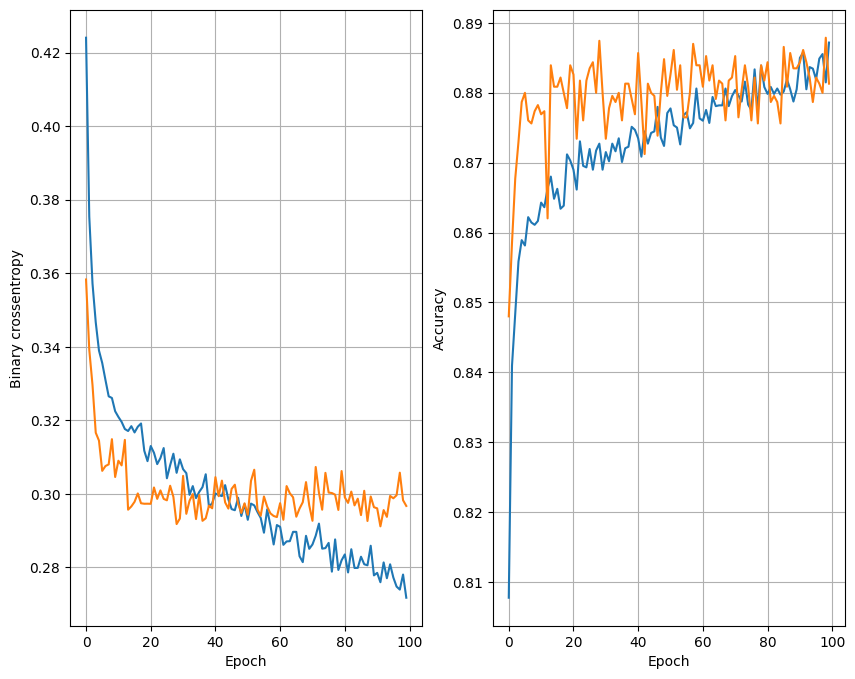

Validation Loss: 0.3109794557094574
64 nodes, dropout 0.2, lr 0.005, batch size 32


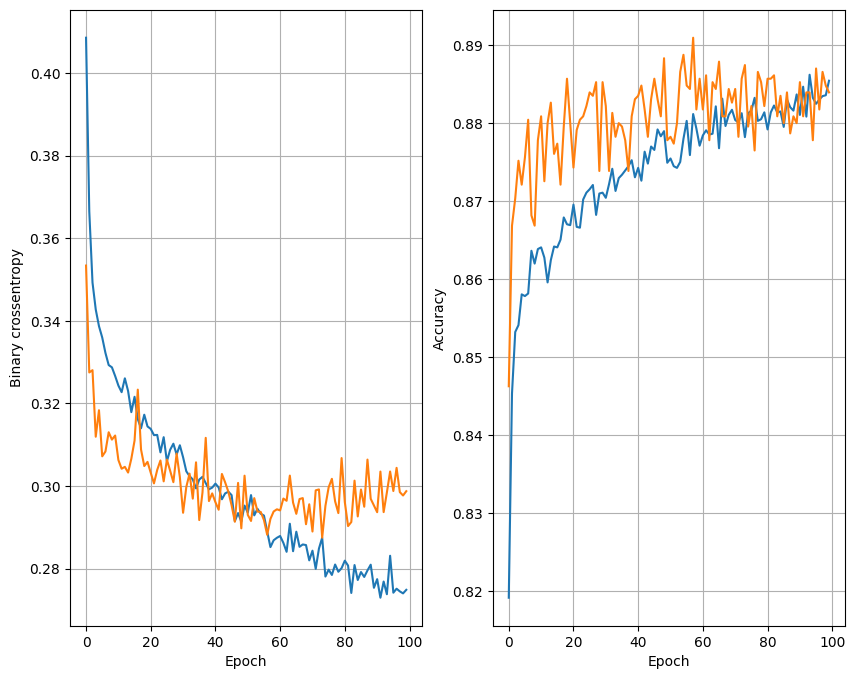

Validation Loss: 0.31881245970726013
64 nodes, dropout 0.2, lr 0.005, batch size 64


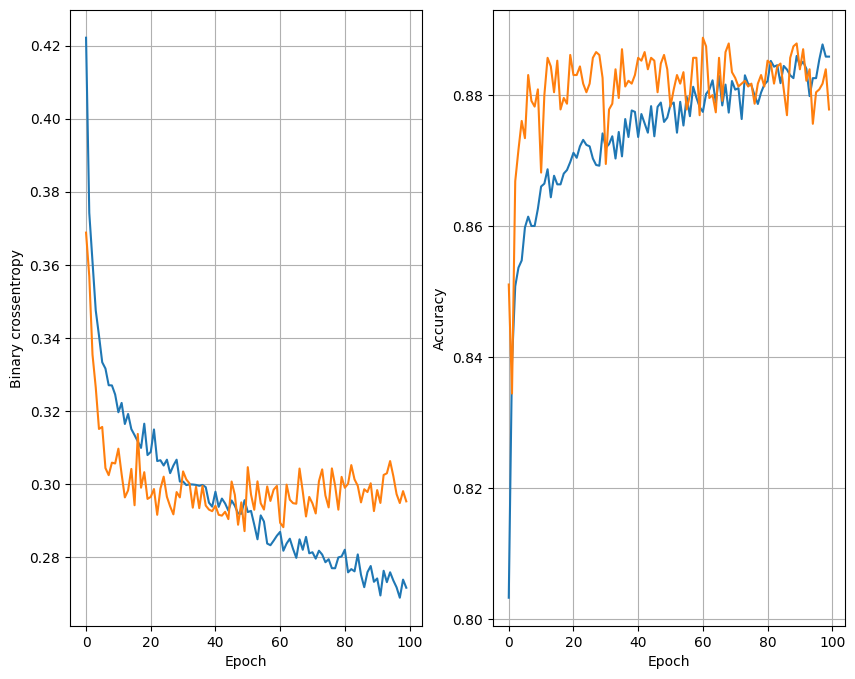

Validation Loss: 0.3233664035797119
64 nodes, dropout 0.2, lr 0.005, batch size 128


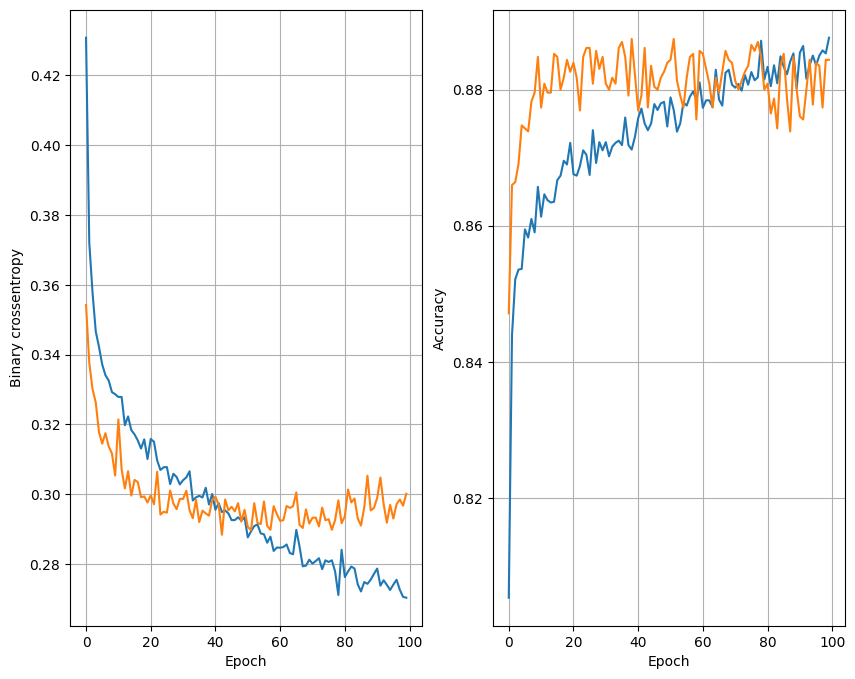

Validation Loss: 0.3153279423713684
64 nodes, dropout 0.2, lr 0.001, batch size 32


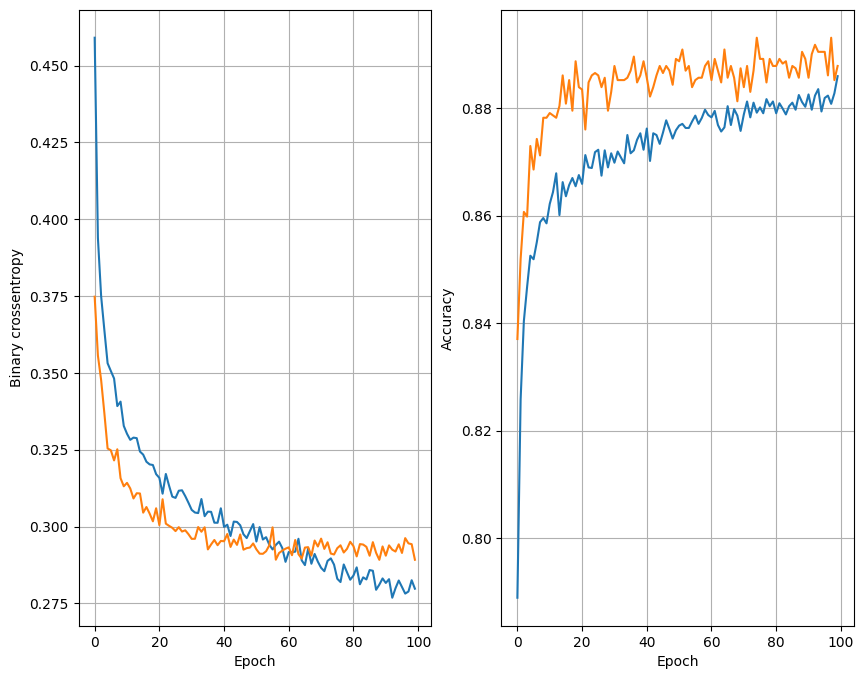

Validation Loss: 0.3070129454135895
Updated least loss model.
64 nodes, dropout 0.2, lr 0.001, batch size 64


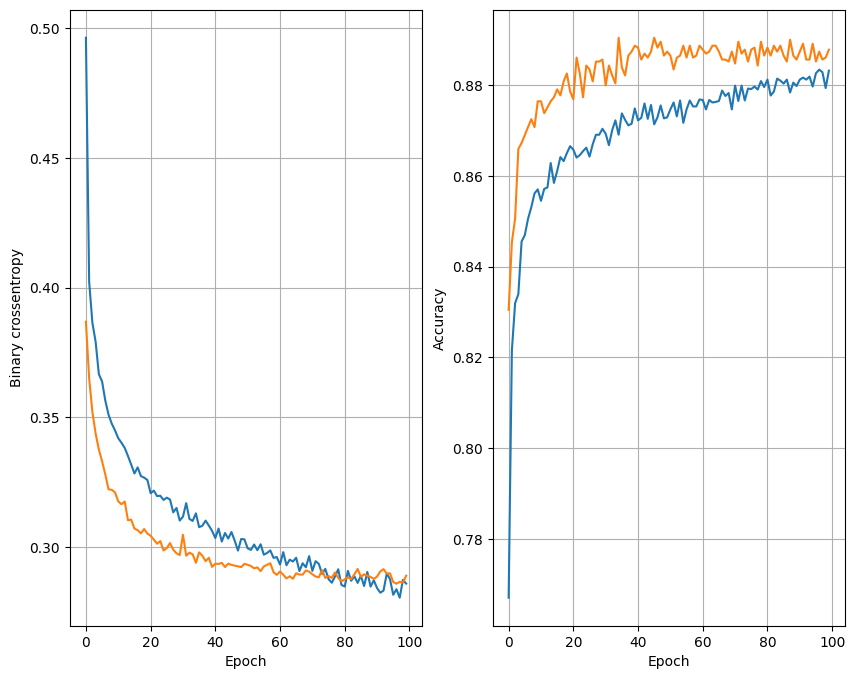

Validation Loss: 0.3030455708503723
Updated least loss model.
64 nodes, dropout 0.2, lr 0.001, batch size 128


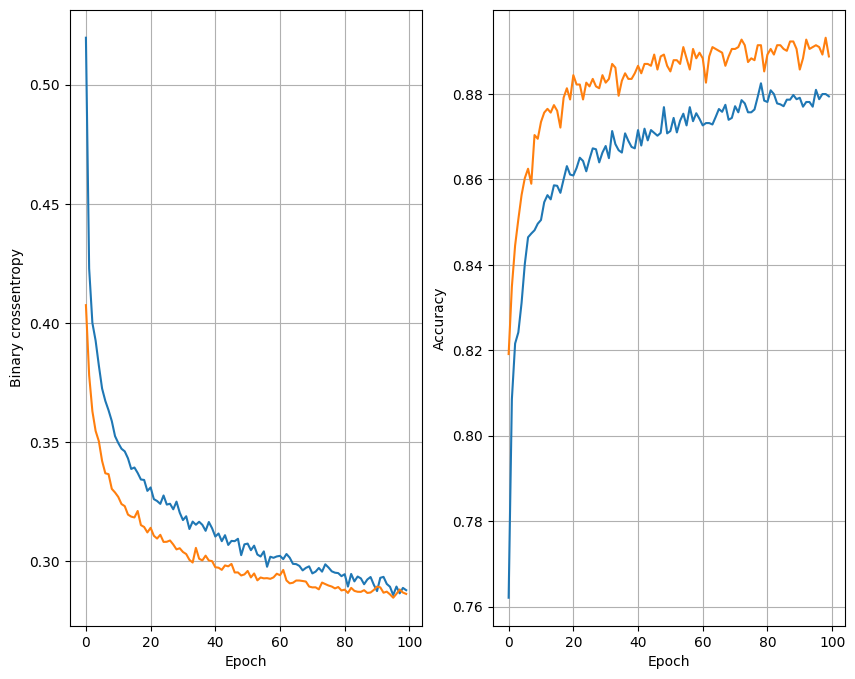

Validation Loss: 0.3037559688091278
Best model has validation loss: 0.3030455708503723


In [58]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid, verbose=0)
                val_loss = val_loss[0] if isinstance(val_loss, list) else val_loss
                print(f"Validation Loss: {val_loss}")
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
                    print("Updated least loss model.")
if least_loss_model is None:
    print("No model was trained successfully.")
else:
    print(f"Best model has validation loss: {least_val_loss}")


In [ ]:
y_pred=least_loss_model.predict(X_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
y_pred

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step


array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1324
           1       0.87      0.95      0.91      2480

    accuracy                           0.88      3804
   macro avg       0.88      0.84      0.86      3804
weighted avg       0.88      0.88      0.87      3804

